### Tableau Dashboard
<br>

https://public.tableau.com/views/FinalProjectPunyansky/FinalDashboard?:language=en-US&:display_count=n&:origin=viz_share_link

### PDF Presentation


https://drive.google.com/file/d/1nv1VhgT8cCQIPVQ1AAVanMJvw7OblD5t/view?usp=sharing

### PROJECT : E-Commerce Product Range Analysis
#### AIM: Identify promising products and products bundle to boost profit and customer satisfaction 
<br>

**Part 1:  Data Overview and Preprocessing**
<br>


- Data loading and Overviewing
- Check missing, duplicated, abnormal data
- Data precalculations
<br>

**Part 2:  RFM (Recency / Frequency / Monetary)**
<br>


- Frequency of orders by month
- Frequency of orders by week
- Frequency of orders by hour of day(AM / PM) 
- Frequency of distribution by previous order

<br>

**Part 3: Product Bundle Analysis**
<br>


- Categorize invoice based on variety and size
- Study invoice variety (number of products) and size (total revenue) distribution
<br>

**Part 4:  Product Description Analysis**
<br>

- Identified keywords in product description
- Study keywords:Build a general function for repeated use (Which keywords are popular, which areunique? Which keywords often appear together in the same group?)
<br>

**Part 5:   Statistical Hypotheses Test**
<br>


- Does distribution of product groups change at different time of the day (AM / PM)?
- Are the number of orders with high amount of low cost product is the same as orders with low amount of high cost products?  
<br>



**Part 6:    Summary and Suggestion**

    

Additional materials:
<br>
https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106
<br>
https://medium.com/@ogunbajoadeyinka/building-an-rfm-model-in-python-3481112a2816 
<br>
https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
<br>

### E-Commerce: Product Range Analysis.

**Task:**
<br>
Analyze the store's product range.
<br>
- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses
    

Description of the data:
<br>
The dataset contains the transaction history of an online store that sells household goods.
<br>
The file **ecommerce_dataset_us.csv** contains the following columns:
<br>
**InvoiceNo** — order identifier
<br>
**StockCode** — item identifier
<br>
**Description** — item name
<br>
**Quantity**
<br>
**InvoiceDate** — order date
<br>
**UnitPrice** — price per item
<br>
**CustomerID**



In [1]:
!pip install -q plotly
!pip install -q sidetable
!pip install -q usaddress

In [2]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import statistics
import scipy.stats as stats
import sidetable
import sys
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
try:
    
    ecommerce = pd.read_csv('/datasets/ecommerce_dataset_us.csv', error_bad_lines=False, sep='\t')
    
    
except:
    
    ecommerce = pd.read_csv('ecommerce_dataset_us.csv', error_bad_lines=False, sep='\t')
    

### Part 1:  Data Overview and Preprocessing

In [4]:
ecommerce.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0  
5  11/29/2018 08:26       7.65     17850.0  
6  11/29/2018 08:26       4.25     17850.0  
7  11/29/2018 08:28       1.85     17850.0  
8  11/29/2018 08:28       1.85     17850.0  
9  11/29/2018 08:34       1.69     13047.0

In [5]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [6]:
ecommerce.stb.missing(style=True)

**We have missing data in CustomerID(24.93%) and Description(0.27%) columns**

In [7]:
null_data = ecommerce[ecommerce.isnull().any(axis=1)]

In [8]:
null_data.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
245239    558614     21581     SKULLS  DESIGN  COTTON TOTE BAG         2   
7141      536991     22572      ROCKING HORSE GREEN CHRISTMAS          4   
490773    578065     22733   3D TRADITIONAL CHRISTMAS STICKERS         1   
377067    569544    15058A        BLUE POLKADOT GARDEN PARASOL         1   
272748    560773     22998        TRAVEL CARD WALLET KEEP CALM         1   
403599    571652     23076          ICE CREAM SUNDAE LIP GLOSS        24   
76259     542622     22246          MAGIC GARDEN FELT GARLAND          1   
62417     541497     22031    BOTANICAL LAVENDER BIRTHDAY CARD         2   
41802     539958     84748  FOLK FELT HANGING MULTICOL GARLAND        15   
93070     544214     22553              PLASTERS IN TIN SKULLS         2   

             InvoiceDate  UnitPrice  CustomerID  
245239  06/28/2019 15:56       1.63         NaN  
7141    12/01/2018 15:16       0.85         NaN  
490773  11/20/2019 15:41       2.46         NaN  
377067  10/02/2019 16:33      10.79         NaN  
272748  07/18/2019 16:17       0.83         NaN  
403599  10/16/2019 12:17       1.25         NaN  
76259   01/29/2019 09:09       4.13         NaN  
62417   01/16/2019 15:19       0.42         NaN  
41802   12/21/2018 13:26       2.51         NaN  
93070   02/15/2019 11:19       3.29         NaN

In [9]:
null_data_d = ecommerce[ecommerce['Description'].isnull()]

In [10]:
null_data_d

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  11/29/2018 11:52        0.0   
1970      536545     21134         NaN         1  11/29/2018 14:32        0.0   
1971      536546     22145         NaN         1  11/29/2018 14:33        0.0   
1972      536547     37509         NaN         1  11/29/2018 14:33        0.0   
1987      536549    85226A         NaN         1  11/29/2018 14:34        0.0   
...          ...       ...         ...       ...               ...        ...   
535322    581199     84581         NaN        -2  12/05/2019 18:26        0.0   
535326    581203     23406         NaN        15  12/05/2019 18:31        0.0   
535332    581209     21620         NaN         6  12/05/2019 18:35        0.0   
536981    581234     72817         NaN        27  12/06/2019 10:33        0.0   
538554    581408     85175         NaN        20  12/06/2019 14:06        0.0   

        CustomerID  
622            NaN  
1970           NaN  
1971           NaN  
1972           NaN  
1987           NaN  
...            ...  
535322         NaN  
535326         NaN  
535332         NaN  
536981         NaN  
538554         NaN  

[1454 rows x 7 columns]

In [11]:
len(null_data)

135080

In [12]:
len(null_data_d)

1454

**Fixing the 'Description' column**

In [13]:
ecommerce['Description'] = ecommerce.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode().max()))

In [14]:
ecommerce['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [15]:
null_data.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
487199    577768     21494      ROTATING LEAVES T-LIGHT HOLDER         1   
5833      536876     22331    WOODLAND PARTY BAG + STICKER SET         1   
473951    576837     23425         STORAGE TIN HOME SWEET HOME         1   
408290    571932     21731       RED TOADSTOOL LED NIGHT LIGHT         1   
227214    556826     21115               ROSE CARAVAN DOORSTOP         1   
234052    557500     22366                    DOORMAT AIRMAIL          1   
435672    574076     22585           PACK OF 6 BIRDY GIFT TAGS         1   
87522     543660    84997D   PINK 3 PIECE POLKADOT CUTLERY SET         1   
431297    573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER         5   
34368     539337     21889              WOODEN BOX OF DOMINOES        12   

             InvoiceDate  UnitPrice  CustomerID  
487199  11/19/2019 15:18       2.46         NaN  
5833    12/01/2018 11:36       3.36         NaN  
473951  11/14/2019 15:16       4.96         NaN  
408290  10/17/2019 17:21       1.65         NaN  
227214  06/13/2019 10:25      14.13         NaN  
234052  06/18/2019 15:27      15.79         NaN  
435672  10/31/2019 15:38       2.46         NaN  
87522   02/09/2019 10:40       8.29         NaN  
431297  10/29/2019 14:41       5.79         NaN  
34368   12/15/2018 10:46       1.25         NaN

In [16]:
ecommerce.stb.missing(style=True)

**Now we have only 112 missing descriptions**

In [17]:
ecommerce.duplicated().sum()

5268

In [18]:
ecommerce.loc[ecommerce.duplicated(), :]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID  
517     11/29/2018 11:45       1.25     17908.0  
527     11/29/2018 11:45       2.10     17908.0  
537     11/29/2018 11:45       2.95     17908.0  
539     11/29/2018 11:45       4.95     17908.0  
555     11/29/2018 11:49       2.95     17920.0  
...                  ...        ...         ...  
541675  12/07/2019 11:34       0.39     14446.0  
541689  12/07/2019 11:34       2.49     14446.0  
541692  12/07/2019 11:34       1.95     14446.0  
541699  12/07/2019 11:34       2.10     14446.0  
541701  12/07/2019 11:34       2.08     14446.0  

[5268 rows x 7 columns]

In [19]:
for i in ecommerce[ecommerce.duplicated()].columns:
    print(i,':', ecommerce[ecommerce.duplicated()][i].nunique())

InvoiceNo : 1933
StockCode : 1706
Description : 1732
Quantity : 35
InvoiceDate : 1914
UnitPrice : 80
CustomerID : 960


In [20]:
ecommerce[ecommerce.duplicated()]['Description'].unique()

array(['UNION JACK FLAG LUGGAGE TAG', 'HAND WARMER SCOTTY DOG DESIGN',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ...,
       'BLACK TEA TOWEL CLASSIC DESIGN', 'FRYING PAN RED RETROSPOT',
       'DOLLY GIRL CHILDRENS CUP'], dtype=object)

In [21]:
StockCode = ecommerce[ecommerce.duplicated()]['StockCode'].unique()
StockCode

array(['21866', '22866', '22900', ..., '22481', '22199', '23291'],
      dtype=object)

In [22]:
ecommerce[ecommerce.StockCode == '21866']

InvoiceNo StockCode                  Description  Quantity  \
494       536409     21866  UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866  UNION JACK FLAG LUGGAGE TAG         1   
6308      536876     21866  UNION JACK FLAG LUGGAGE TAG         1   
6864      536982     21866  UNION JACK FLAG LUGGAGE TAG         8   
12236     537371     21866  UNION JACK FLAG LUGGAGE TAG         8   
...          ...       ...                          ...       ...   
528914    580730     21866  UNION JACK FLAG LUGGAGE TAG         2   
532212    580983     21866  UNION JACK FLAG LUGGAGE TAG         3   
534838    581173     21866  UNION JACK FLAG LUGGAGE TAG         1   
536518    581219     21866  UNION JACK FLAG LUGGAGE TAG         1   
537659    581334     21866  UNION JACK FLAG LUGGAGE TAG         2   

             InvoiceDate  UnitPrice  CustomerID  
494     11/29/2018 11:45       1.25     17908.0  
517     11/29/2018 11:45       1.25     17908.0  
6308    12/01/2018 11:36       2.51         NaN  
6864    12/01/2018 14:27       3.36         NaN  
12236   12/04/2018 12:47       1.25     15028.0  
...                  ...        ...         ...  
528914  12/03/2019 17:28       2.46         NaN  
532212  12/04/2019 16:26       2.46         NaN  
534838  12/05/2019 15:07       1.25     17870.0  
536518  12/06/2019 09:28       2.46         NaN  
537659  12/06/2019 12:07       1.25     17841.0  

[197 rows x 7 columns]

In [23]:
InvoiceNo = ecommerce[ecommerce.duplicated()]['InvoiceNo'].unique()
InvoiceNo

array(['536409', '536412', '536446', ..., '581471', '581514', '581538'],
      dtype=object)

In [24]:
ecommerce[ecommerce.InvoiceNo == '536409']

InvoiceNo StockCode                          Description  Quantity  \
483    536409    90199C      5 STRAND GLASS NECKLACE CRYSTAL         3   
484    536409     21479        WHITE SKULL HOT WATER BOTTLE          1   
485    536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
486    536409     22785  SQUARECUSHION COVER PINK UNION FLAG         1   
487    536409     22975           SPACEBOY CHILDRENS EGG CUP         1   
488    536409     22972              CHILDREN'S SPACEBOY MUG         1   
489    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
490    536409     22568                FELTCRAFT CUSHION OWL         1   
491    536409     85116      BLACK CANDELABRA T-LIGHT HOLDER         1   
492    536409     22664           TOY TIDY DOLLY GIRL DESIGN         1   
493    536409     21609  SET 12 LAVENDER  BOTANICAL T-LIGHTS         1   
494    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
495    536409     20669                RED HEART LUGGAGE TAG         1   
496    536409    90129F           RED GLASS TASSLE BAG CHARM         1   
497    536409    90210B         CLEAR ACRYLIC FACETED BANGLE         1   
498    536409    90199C      5 STRAND GLASS NECKLACE CRYSTAL         1   
499    536409     21955    DOORMAT UNION JACK GUNS AND ROSES         1   
500    536409    72802C    VANILLA SCENT CANDLE JEWELLED BOX         1   
501    536409     22109         FULL ENGLISH BREAKFAST PLATE         1   
502    536409     85116      BLACK CANDELABRA T-LIGHT HOLDER         5   
503    536409     22531  MAGIC DRAWING SLATE CIRCUS PARADE           1   
504    536409     21811    CHRISTMAS HANGING HEART WITH BELL         1   
505    536409     22183    CAKE STAND VICTORIAN FILIGREE MED         1   
506    536409     21678            PAISLEY PATTERN  STICKERS         6   
507    536409     21676                    FLOWERS  STICKERS         6   
508    536409    84625A   PINK NEW BAROQUECANDLESTICK CANDLE         1   
509    536409    84625C  BLUE NEW BAROQUE CANDLESTICK CANDLE         3   
510    536409     21931               JUMBO STORAGE BAG SUKI         2   
511    536409    85169B               BLACK LOVE BIRD CANDLE        12   
512    536409     16238            PARTY TIME PENCIL ERASERS        28   
513    536409     20668      DISCO BALL CHRISTMAS DECORATION        24   
514    536409     84906         PINK B'FLY C/COVER W BOBBLES         1   
515    536409     21867         PINK UNION JACK  LUGGAGE TAG         1   
516    536409     22075         6 RIBBONS ELEGANT CHRISTMAS          1   
517    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
518    536409     21326     AGED GLASS SILVER T-LIGHT HOLDER        12   
519    536409     21065               BOOM BOX SPEAKER GIRLS         1   
520    536409     22074          6 RIBBONS SHIMMERING PINKS          1   
521    536409     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
522    536409     20713                       JUMBO BAG OWLS         1   
523    536409     20966                 SANDWICH BATH SPONGE         2   
524    536409     21116                         OWL DOORSTOP         1   
525    536409    90199C      5 STRAND GLASS NECKLACE CRYSTAL         2   
526    536409     22633               HAND WARMER UNION JACK         1   
527    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
528    536409     22198                LARGE POPCORN HOLDER          1   
529    536409     21824  PAINTED METAL STAR WITH HOLLY BELLS         3   
530    536409     21823  PAINTED METAL HEART WITH HOLLY BELL         3   
531    536409     22153      ANGEL DECORATION STARS ON DRESS         6   
532    536409     22197                 SMALL POPCORN HOLDER         2   
533    536409    85099B              JUMBO BAG RED RETROSPOT         2   
534    536409    85099F                 JUMBO BAG STRAWBERRY         1   
535    536409     20717               STRAWBERRY SHOPPER BAG         1   
536    5

In [25]:
ecommerce[ecommerce.InvoiceNo == '581538']

InvoiceNo StockCode                     Description  Quantity  \
541628    581538     23193  BUFFALO BILL TREASURE BOOK BOX         6   
541629    581538     23194      GYMKHANA TREASURE BOOK BOX         1   
541630    581538     23084              RABBIT NIGHT LIGHT         2   
541631    581538     22068     BLACK PIRATE TREASURE CHEST         1   
541632    581538     22956        36 FOIL HEART CAKE CASES         1   
...          ...       ...                             ...       ...   
541697    581538     21194       PINK  HONEYCOMB PAPER FAN         1   
541698    581538    35004B     SET OF 3 BLACK FLYING DUCKS         1   
541699    581538     22694                    WICKER STAR          1   
541700    581538     21355         TOAST ITS - I LOVE YOU          1   
541701    581538     23343    JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID  
541628  12/07/2019 11:34       2.25     14446.0  
541629  12/07/2019 11:34       2.25     14446.0  
541630  12/07/2019 11:34       2.08     14446.0  
541631  12/07/2019 11:34       0.39     14446.0  
541632  12/07/2019 11:34       0.79     14446.0  
...                  ...        ...         ...  
541697  12/07/2019 11:34       0.65     14446.0  
541698  12/07/2019 11:34       5.45     14446.0  
541699  12/07/2019 11:34       2.10     14446.0  
541700  12/07/2019 11:34       1.25     14446.0  
541701  12/07/2019 11:34       2.08     14446.0  

[74 rows x 7 columns]

In [26]:
duplicateRowsDF = ecommerce[ecommerce['Description'].duplicated()]

In [27]:
duplicateRowsDF

InvoiceNo StockCode                         Description  Quantity  \
47        536372     22632           HAND WARMER RED POLKA DOT         6   
48        536372     22633              HAND WARMER UNION JACK         6   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
50        536373     71053                 WHITE METAL LANTERN         6   
51        536373    84406B      CREAM CUPID HEARTS COAT HANGER         8   
...          ...       ...                                 ...       ...   
541904    581587     22613         PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899        CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254       CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255     CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138       BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID  
47      11/29/2018 09:01       1.85     17850.0  
48      11/29/2018 09:01       1.85     17850.0  
49      11/29/2018 09:02       2.55     17850.0  
50      11/29/2018 09:02       3.39     17850.0  
51      11/29/2018 09:02       2.75     17850.0  
...                  ...        ...         ...  
541904  12/07/2019 12:50       0.85     12680.0  
541905  12/07/2019 12:50       2.10     12680.0  
541906  12/07/2019 12:50       4.15     12680.0  
541907  12/07/2019 12:50       4.15     12680.0  
541908  12/07/2019 12:50       4.95     12680.0  

[537685 rows x 7 columns]

In [28]:
ecommerce.duplicated().sum()

5268

In [29]:
"{0:.6f}".format((ecommerce.duplicated().sum() / len(ecommerce))*100)

'0.972119'

In [30]:
for i in ecommerce[ecommerce.duplicated()].columns:
    print(i,':', ecommerce[ecommerce.duplicated()][i].nunique())

InvoiceNo : 1933
StockCode : 1706
Description : 1732
Quantity : 35
InvoiceDate : 1914
UnitPrice : 80
CustomerID : 960


**We investigated all the "Duplicates" in our data and discovered that they are duplicates for a reason.
<br>
InvoiceNo : 1933 can be duplicated because we have multiple products in same order
<br>
StockCode : 1706 can be duplicated because we have same products in different orders
<br>
Description : 1732 can be duplicated because we have same descriptoion for same products
<br>
Quantity : 35 we have few orders with same quantity
<br>
InvoiceDate : 1914 we have many orders in same date
<br>
UnitPrice : 80 we have different products with same prise
<br>
CustomerID : 960 same user can make more then one order
<br>
<br>
So we don't need to remove any "duplicates"**

In [31]:
ecommerce = ecommerce.rename(columns=str.lower)

In [32]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  541797 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [33]:
ecommerce.columns =['invoice_num','stock_code','description','quantity','invoice_date','unit_price','customer_id']

In [34]:
ecommerce.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       invoice_date  unit_price  customer_id  
0  11/29/2018 08:26        2.55      17850.0  
1  11/29/2018 08:26        3.39      17850.0  
2  11/29/2018 08:26        2.75      17850.0  
3  11/29/2018 08:26        3.39      17850.0  
4  11/29/2018 08:26        3.39      17850.0

In [35]:
ecommerce['invoice_date'] = pd.to_datetime(ecommerce['invoice_date'])

In [36]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   541797 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [37]:
ecommerce['invoice_day'] = ecommerce['invoice_date'].astype('datetime64[D]')
ecommerce['invoice_time'] = ecommerce['invoice_date'].dt.strftime('%H:%M:%S')

In [38]:
ecommerce.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  
0 2018-11-29 08:26:00        2.55      17850.0  2018-11-29     08:26:00  
1 2018-11-29 08:26:00        3.39      17850.0  2018-11-29     08:26:00  
2 2018-11-29 08:26:00        2.75      17850.0  2018-11-29     08:26:00  
3 2018-11-29 08:26:00        3.39      17850.0  2018-11-29     08:26:00  
4 2018-11-29 08:26:00        3.39      17850.0  2018-11-29     08:26:00

**Taking care of missing values**

In [39]:
ecommerce = ecommerce.dropna(axis=0, subset=['description'])

In [40]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541797 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541797 non-null  object        
 1   stock_code    541797 non-null  object        
 2   description   541797 non-null  object        
 3   quantity      541797 non-null  int64         
 4   invoice_date  541797 non-null  datetime64[ns]
 5   unit_price    541797 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   invoice_day   541797 non-null  datetime64[ns]
 8   invoice_time  541797 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 41.3+ MB


In [41]:
ecommerce = ecommerce.fillna(0)
ecommerce['customer_id'] = ecommerce['customer_id'].astype(int)

In [42]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541797 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541797 non-null  object        
 1   stock_code    541797 non-null  object        
 2   description   541797 non-null  object        
 3   quantity      541797 non-null  int64         
 4   invoice_date  541797 non-null  datetime64[ns]
 5   unit_price    541797 non-null  float64       
 6   customer_id   541797 non-null  int32         
 7   invoice_day   541797 non-null  datetime64[ns]
 8   invoice_time  541797 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(4)
memory usage: 39.3+ MB


In [43]:
ecommerce.sample(10)

invoice_num stock_code                       description  quantity  \
214690      555602      23203         JUMBO BAG DOILEY PATTERNS        10   
20715       538071      20829  GLITTER HANGING BUTTERFLY STRING         1   
289972      562345      21905           MORE BUTTER METAL SIGN         60   
401857      571443      22941      CHRISTMAS LIGHTS 10 REINDEER         1   
520869      580305      23581            JUMBO BAG PAISLEY PARK         1   
355593      567954      23399     HOME SWEET HOME HANGING HEART        12   
434580      574052      22174                        PHOTO CUBE         1   
245842      558635      22962             JAM JAR WITH PINK LID         3   
180503      552322      21754          HOME BUILDING BLOCK WORD         3   
403001      571544      22684     FRENCH BLUE METAL DOOR SIGN 9         1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  
214690 2019-06-04 11:26:00        2.08        16235  2019-06-04     11:26:00  
20715  2018-12-07 14:09:00        4.21            0  2018-12-07     14:09:00  
289972 2019-08-02 12:14:00        0.79        13694  2019-08-02     12:14:00  
401857 2019-10-15 13:43:00        8.50        17785  2019-10-15     13:43:00  
520869 2019-11-30 14:26:00        2.08        12970  2019-11-30     14:26:00  
355593 2019-09-21 08:30:00        0.85        13004  2019-09-21     08:30:00  
434580 2019-10-31 13:50:00        1.65        16706  2019-10-31     13:50:00  
245842 2019-06-28 19:52:00        0.85        16498  2019-06-28     19:52:00  
180503 2019-05-07 09:16:00        5.95        17049  2019-05-07     09:16:00  
403001 2019-10-15 16:53:00        1.25        17757  2019-10-15     16:53:00

In [44]:
ecommerce.describe()

quantity     unit_price    customer_id
count  541797.000000  541797.000000  541797.000000
mean        9.555919       4.612067   11479.347185
std       218.103428      96.769831    6776.599666
min    -80995.000000  -11062.060000       0.000000
25%         1.000000       1.250000   12356.000000
50%         3.000000       2.080000   14382.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000

In [45]:
ecommerce.describe(include = 'all').T

count unique                                 top  freq  \
invoice_num     541797  25788                              573585  1114   
stock_code      541797   3958                              85123A  2313   
description     541797   4223  WHITE HANGING HEART T-LIGHT HOLDER  2369   
quantity      541797.0    NaN                                 NaN   NaN   
invoice_date    541797  23211                 2019-10-29 14:41:00  1114   
unit_price    541797.0    NaN                                 NaN   NaN   
customer_id   541797.0    NaN                                 NaN   NaN   
invoice_day     541797    305                 2019-12-03 00:00:00  5331   
invoice_time    541797    774                            15:56:00  2627   

                           first                last          mean  \
invoice_num                  NaT                 NaT           NaN   
stock_code                   NaT                 NaT           NaN   
description                  NaT                 NaT           NaN   
quantity                     NaT                 NaT      9.555919   
invoice_date 2018-11-29 08:26:00 2019-12-07 12:50:00           NaN   
unit_price                   NaT                 NaT      4.612067   
customer_id                  NaT                 NaT  11479.347185   
invoice_day  2018-11-29 00:00:00 2019-12-07 00:00:00           NaN   
invoice_time                 NaT                 NaT           NaN   

                      std       min      25%      50%      75%      max  
invoice_num           NaN       NaN      NaN      NaN      NaN      NaN  
stock_code            NaN       NaN      NaN      NaN      NaN      NaN  
description           NaN       NaN      NaN      NaN      NaN      NaN  
quantity       218.103428  -80995.0      1.0      3.0     10.0  80995.0  
invoice_date          NaN       NaN      NaN      NaN      NaN      NaN  
unit_price      96.769831 -11062.06     1.25     2.08     4.13  38970.0  
customer_id   6776.599666       0.0  12356.0  14382.0  16255.0  18287.0  
invoice_day           NaN       NaN      NaN      NaN      NaN      NaN  
invoice_time          NaN       NaN      NaN      NaN      NaN      NaN

In [46]:
ecommerce['quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
          -20,    110,    -22,    -30,    -70,   -130,    -80,   -120,
          -40,    -25,    -14,    -15,    -69,   -140,   -320,     -8,
      

**We assume that all the negative values are customers cancellations so we decided to drop them from our dataset**

In [47]:
ecommerce_pos = ecommerce[ecommerce.select_dtypes(include=[np.number]).ge(0).all(1)]

In [48]:
ecommerce_pos['quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    56,    72,
         200,   600,   480,    14,    11,    33,    13,    70,   252,
          60,   216,   384,    27,    15,    22,    19,    17,    21,
          34,    47,   108,    52,    75,   270,    42,   240,    90,
         320,  1824,   204,    69,   160,  2880,  1400,    39,    26,
        1440,    31,    82,    78,    97,    98,    35,   110,   720,
         156,   324,    38,    37,    49,    95,    29,    41,   402,
         378,   150,   300,    54,   104,    67,   258,    66,    44,
          55,    46,    99,    61,   408,   972,   208,  1008,  1000,
        1488,   250,  1394,   400,    79,    84,   272,   113,    45,
         106,    68,   267,   115,    65,  1728,    53,    76,   460,
          71,    43,

In [49]:
ecommerce_pos['unit_price'].unique()

array([   2.55,    3.39,    2.75, ...,    4.76,  933.17, 1714.17])

In [50]:
ecommerce_pos.describe()

quantity     unit_price    customer_id
count  531268.000000  531268.000000  531268.000000
mean       10.655409       3.899064   11455.564931
std       156.832811      35.876779    6795.103819
min         1.000000       0.000000       0.000000
25%         1.000000       1.250000       0.000000
50%         3.000000       2.080000   14375.000000
75%        10.000000       4.130000   16261.000000
max     80995.000000   13541.330000   18287.000000

In [51]:
ecommerce_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531268 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   531268 non-null  object        
 1   stock_code    531268 non-null  object        
 2   description   531268 non-null  object        
 3   quantity      531268 non-null  int64         
 4   invoice_date  531268 non-null  datetime64[ns]
 5   unit_price    531268 non-null  float64       
 6   customer_id   531268 non-null  int32         
 7   invoice_day   531268 non-null  datetime64[ns]
 8   invoice_time  531268 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(4)
memory usage: 38.5+ MB


In [52]:
ecommerce_pos.stb.missing(style=True)

In [53]:
"{0:.2f}".format(((ecommerce.shape[0] - ecommerce_pos.shape[0]) / ecommerce.shape[0])*100)

'1.94'

**Than we dropped all negative values we lost only 1.94% of our data**

**We have a lots of negative values in our dataset, may be because of users reclamations**

In [54]:
ecommerce_pos.groupby(['invoice_num'])['stock_code'].count().reset_index()

invoice_num  stock_code
0          536365           7
1          536366           2
2          536367          12
3          536368           4
4          536369           1
...           ...         ...
20706      581584           2
20707      581585          21
20708      581586           4
20709      581587          15
20710     A563185           1

[20711 rows x 2 columns]

**Averege items per order**

In [55]:
"{0:.2f}".format(ecommerce_pos.groupby(['invoice_num'])['stock_code'].count().mean())

'25.65'

In [56]:
ecommerce_pos.head(10)

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5      536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
6      536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7      536366      22633               HAND WARMER UNION JACK         6   
8      536366      22632            HAND WARMER RED POLKA DOT         6   
9      536367      84879        ASSORTED COLOUR BIRD ORNAMENT        32   

         invoice_date  unit_price  customer_id invoice_day invoice_time  
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00  
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00  
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00  
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00  
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00  
5 2018-11-29 08:26:00        7.65        17850  2018-11-29     08:26:00  
6 2018-11-29 08:26:00        4.25        17850  2018-11-29     08:26:00  
7 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00  
8 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00  
9 2018-11-29 08:34:00        1.69        13047  2018-11-29     08:34:00

**We take care of "duplicates" and missing values, so we can proceed with our analysis**

### Part 2:  RFM (Recency / Frequency / Monetary)

In [57]:
from datetime import date
today=date.today()
today

datetime.date(2022, 9, 2)

In [58]:
ecommerce_pos['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

**So, we desidet that NOW is the last date of 2019**

In [59]:
import datetime as dt
NOW=dt.datetime(2019,12,31)
NOW

datetime.datetime(2019, 12, 31, 0, 0)

In [60]:
ecommerce_pos['total_sum'] = ecommerce_pos['quantity'] * ecommerce_pos['unit_price']

In [61]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [62]:
ecommerce_rfm = ecommerce_pos.groupby('invoice_num').agg({
   
    'invoice_date': lambda x: (NOW-x.max()).days,
    'stock_code': 'count',
    'total_sum':'sum'
}).reset_index()

In [63]:
ecommerce_rfm.rename(columns={'invoice_date':'recency',
                    'stock_code':'frequency',
                   'total_sum':'monetary_value'},inplace=True)
ecommerce_rfm.sort_values(by='invoice_num')

invoice_num  recency  frequency  monetary_value
0          536365      396          7          139.12
1          536366      396          2           22.20
2          536367      396         12          278.73
3          536368      396          4           70.05
4          536369      396          1           17.85
...           ...      ...        ...             ...
20706      581584       23          2          140.64
20707      581585       23         21          329.05
20708      581586       23          4          339.20
20709      581587       23         15          249.45
20710     A563185      142          1        11062.06

[20711 rows x 4 columns]

In [64]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import plotly.offline as pyoff
import plotly as py
import plotly.graph_objs as go


In [65]:
for i in ecommerce_rfm:
    if i=='invoice_num':
        continue
    else: 
        plot_data=[
            go.Histogram(x=ecommerce_rfm[i])
        ]
        plot_layout=go.Layout(title=i)
        plt.figure(figsize=(10, 15)) 
        fig=go.Figure(data=plot_data,layout=plot_layout)
        pyoff.iplot(fig)

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

In [66]:
f_labels=range(1,5)
ecommerce_rfm['F']=pd.qcut(ecommerce_rfm.frequency,q=4,labels=f_labels)

In [67]:
f_labels

range(1, 5)

In [68]:
ecommerce_rfm['F'].unique()

[2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [69]:
ecommerce_rfm

invoice_num  recency  frequency  monetary_value  F
0          536365      396          7          139.12  2
1          536366      396          2           22.20  1
2          536367      396         12          278.73  2
3          536368      396          4           70.05  1
4          536369      396          1           17.85  1
...           ...      ...        ...             ... ..
20706      581584       23          2          140.64  1
20707      581585       23         21          329.05  3
20708      581586       23          4          339.20  1
20709      581587       23         15          249.45  2
20710     A563185      142          1        11062.06  1

[20711 rows x 5 columns]

In [70]:
m_labels=range(1,5)
ecommerce_rfm['M']=pd.qcut(ecommerce_rfm.monetary_value,q=4,labels=m_labels)

In [71]:
r_labels=range(4,0,-1)
ecommerce_rfm['R']=pd.qcut(ecommerce_rfm.recency,q=4,labels=r_labels)

In [72]:
ecommerce_rfm['R'].unique()

[1, 2, 3, 4]
Categories (4, int64): [4 < 3 < 2 < 1]

In [73]:
ecommerce_rfm

invoice_num  recency  frequency  monetary_value  F  M  R
0          536365      396          7          139.12  2  2  1
1          536366      396          2           22.20  1  1  1
2          536367      396         12          278.73  2  2  1
3          536368      396          4           70.05  1  1  1
4          536369      396          1           17.85  1  1  1
...           ...      ...        ...             ... .. .. ..
20706      581584       23          2          140.64  1  2  4
20707      581585       23         21          329.05  3  3  4
20708      581586       23          4          339.20  1  3  4
20709      581587       23         15          249.45  2  2  4
20710     A563185      142          1        11062.06  1  4  3

[20711 rows x 7 columns]

**Calculating RFM segment**

In [74]:
ecommerce_rfm['RFM_segment']=ecommerce_rfm['R'].astype(str)+ecommerce_rfm['F'].astype(str)+ecommerce_rfm['M'].astype(str)
ecommerce_rfm

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment
0          536365      396          7          139.12  2  2  1         122
1          536366      396          2           22.20  1  1  1         111
2          536367      396         12          278.73  2  2  1         122
3          536368      396          4           70.05  1  1  1         111
4          536369      396          1           17.85  1  1  1         111
...           ...      ...        ...             ... .. .. ..         ...
20706      581584       23          2          140.64  1  2  4         412
20707      581585       23         21          329.05  3  3  4         433
20708      581586       23          4          339.20  1  3  4         413
20709      581587       23         15          249.45  2  2  4         422
20710     A563185      142          1        11062.06  1  4  3         314

[20711 rows x 8 columns]

In [75]:
ecommerce_rfm['RFM_segment'].nunique()

64

In [76]:
ecommerce_rfm['RFM_segment'].value_counts()

211    884
111    865
411    841
311    828
344    749
      ... 
331     92
341     51
441     51
141     36
241     33
Name: RFM_segment, Length: 64, dtype: int64

**Developing RFM clusters**

In [77]:
def rfm_total(x):
    if x>=10:
        return 'Whipped Cream'
    elif x>=9 and x<10:
        return 'Champion'
    elif x>=8 and x<9:
        return 'Loyal'
    elif x>=7 and x<8:
        return 'Potential'
    elif x>=6 and x<7:
        return 'Promising'
    elif x>=5 and x<6:
        return 'Needs attention'
    else:
        return 'At risk'

In [78]:
ecommerce_rfm['total_score']=ecommerce_rfm[['R','F','M']].sum(axis=1)

In [79]:
ecommerce_rfm['group']=ecommerce_rfm['total_score'].apply(rfm_total)
ecommerce_rfm.sample(10)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
6503       550994      255         37          481.40  4  3  2         243   
5981       549932      263          8          124.80  2  1  2         221   
15750      571056       80         29          434.41  3  3  4         433   
19884      579938       31         73         1225.16  4  4  4         444   
12538      564058      132         11          230.98  2  2  3         322   
19951      580093       31          2           59.10  1  1  4         411   
18824      577534       42          5           23.79  1  1  4         411   
1114       538832      383         25          413.79  3  3  1         133   
9210       556887      200         16          119.29  3  1  2         231   
11516      561861      154          4          458.94  1  3  3         313   

       total_score            group  
6503             9         Champion  
5981             5  Needs attention  
15750           10    Whipped Cream  
19884           12    Whipped Cream  
12538            7        Potential  
19951            6        Promising  
18824            6        Promising  
1114             7        Potential  
9210             6        Promising  
11516            7        Potential

In [80]:
ecommerce_rfm.query('group == "At risk"').sort_values('total_score',ascending=True)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
1          536366      396          2           22.20  1  1  1         111   
2903       543128      332          3           64.00  1  1  1         111   
2905       543130      332          4           78.00  1  1  1         111   
2908       543133      332          4           71.90  1  1  1         111   
2909       543134      332          1           15.00  1  1  1         111   
...           ...      ...        ...             ... .. .. ..         ...   
201        536747      395         12          100.20  2  1  1         121   
4861       547406      284          5          170.94  1  2  1         112   
4860       547405      284          8          114.00  2  1  1         121   
170        536640      395         11           45.85  2  1  1         121   
10291      559166      179          1            1.44  1  1  2         211   

       total_score    group  
1                3  At risk  
2903             3  At risk  
2905             3  At risk  
2908             3  At risk  
2909             3  At risk  
...            ...      ...  
201              4  At risk  
4861             4  At risk  
4860             4  At risk  
170              4  At risk  
10291            4  At risk  

[2241 rows x 10 columns]

In [81]:
ecommerce_pos[ecommerce_pos.invoice_num == '536366']

invoice_num stock_code                description  quantity  \
7      536366      22633     HAND WARMER UNION JACK         6   
8      536366      22632  HAND WARMER RED POLKA DOT         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
7 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00   
8 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00   

   total_sum  
7       11.1  
8       11.1

In [82]:
ecommerce_pos[ecommerce_pos.invoice_num == '543128']

invoice_num stock_code                         description  quantity  \
81430      543128      21621          VINTAGE UNION JACK BUNTING         4   
81431      543128      22219  LOVEBIRD HANGING DECORATION WHITE         12   
81432      543128      22464         HANGING METAL HEART LANTERN        12   

             invoice_date  unit_price  customer_id invoice_day invoice_time  \
81430 2019-02-01 14:54:00        8.50        12971  2019-02-01     14:54:00   
81431 2019-02-01 14:54:00        0.85        12971  2019-02-01     14:54:00   
81432 2019-02-01 14:54:00        1.65        12971  2019-02-01     14:54:00   

       total_sum  
81430       34.0  
81431       10.2  
81432       19.8

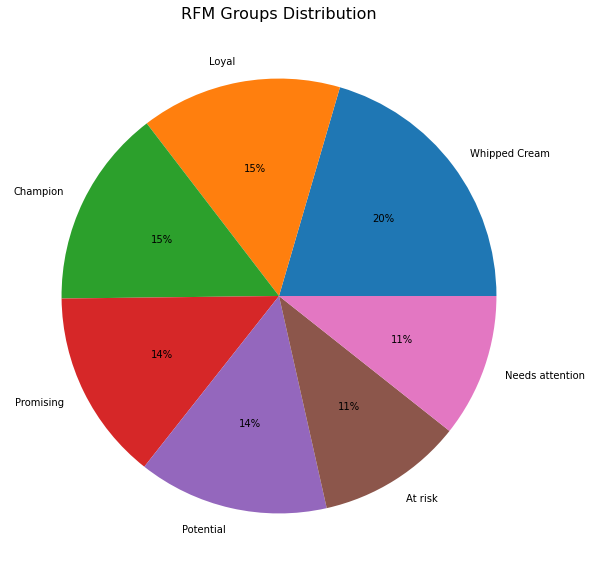

In [83]:
plt.figure(figsize=(10,10))
plt.pie(ecommerce_rfm.group.value_counts(),
        labels = ecommerce_rfm.group.value_counts().index,
        autopct='%.0f%%')
plt.title('RFM Groups Distribution', fontsize = 16)
plt.show()

**Calculating the average values for each RFM_Level, and return a size of each segment using the python script below:**

In [84]:
ecommerce_rfm.sample(10)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
1779       540420      359          6          207.25  2  2  1         122   
2147       541282      349         50          895.50  4  4  1         144   
18130      576086       48          8          135.45  2  1  4         421   
9465       557331      195          2           32.28  1  1  2         211   
12943      564957      123         10          195.15  2  2  3         322   
15151      569718       87         24          391.98  3  3  3         333   
4743       547088      287         18          304.90  3  3  1         133   
4564       546785      290          5          302.52  1  3  1         113   
14173      567673      102        195         1555.88  4  4  3         344   
10093      558772      182         12          156.91  2  2  2         222   

       total_score            group  
1779             5  Needs attention  
2147             9         Champion  
18130            7        Potential  
9465             4          At risk  
12943            7        Potential  
15151            9         Champion  
4743             7        Potential  
4564             5  Needs attention  
14173           11    Whipped Cream  
10093            6        Promising

**Calculate average values for each RFM_Level, and return a size of each segment**

In [85]:
 
ecommerce_rfm_level_agg = ecommerce_rfm.groupby('group').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1).reset_index()
ecommerce_rfm_level_agg.columns=['group','recency','frequency','monetary_mean','monetary_sum']
ecommerce_rfm_level_agg.sort_values('monetary_sum',ascending=False)

group  recency  frequency  monetary_mean  monetary_sum
6    Whipped Cream    100.3       60.1         1060.7          4241
2            Loyal    170.7       20.0          447.1          3092
1         Champion    171.2       39.8          828.5          3061
5        Promising    195.6        8.8          256.2          2937
4        Potential    209.8       15.6          363.6          2932
0          At risk    297.7        3.0           61.2          2241
3  Needs attention    235.9        6.6          133.2          2207

In [86]:
!pip install -q squarify
import squarify


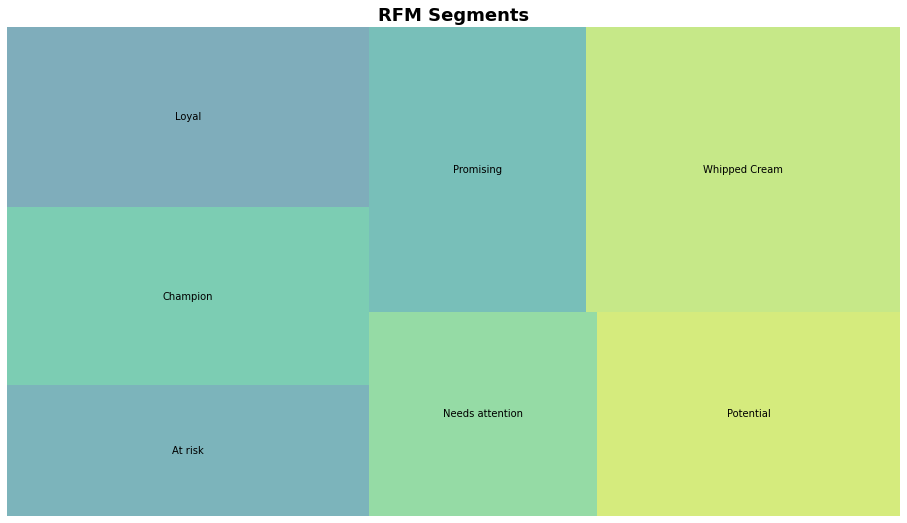

In [87]:
ecommerce_rfm_level_agg.columns = ['group','recency_mean','frequency_mean','monetary_mean', 'count']

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=ecommerce_rfm_level_agg['count'], 
              label=['At risk',
                     'Champion',
                     'Loyal',
                     'Needs attention',
                     'Potential', 
                     'Promising', 
                     'Whipped Cream'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

https://drive.google.com/file/d/1EEOTaJ_3cP9vh1ITpDdm2b8XItTdRzYV/view?usp=sharing

**Checking the distribution of items among the orders in 'Whipped Cream' and 'At risk'**

In [88]:
ecommerce_rfm.head()

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
0      536365      396          7          139.12  2  2  1         122   
1      536366      396          2           22.20  1  1  1         111   
2      536367      396         12          278.73  2  2  1         122   
3      536368      396          4           70.05  1  1  1         111   
4      536369      396          1           17.85  1  1  1         111   

   total_score            group  
0            5  Needs attention  
1            3          At risk  
2            5  Needs attention  
3            3          At risk  
4            3          At risk

**'Whipped Cream' group of ordes**

In [89]:
group_Whipped_Cream = ecommerce_rfm.query('group == "Whipped Cream"')

In [90]:
group_Whipped_Cream.sort_values(by='monetary_value',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
17568      574941       55        101        52940.94  4  4  4         444   
18237      576365       48         99        50653.91  4  4  4         444   
9227       556917      200        138        22775.93  4  4  2         244   
16279      572209       72          7        22206.00  2  4  4         424   
12322      563614      136         97        21880.44  4  4  3         344   
...           ...      ...        ...             ... .. .. ..         ...   
18810      577520       42         34          141.48  4  2  4         442   
16722      573139       66         32          141.12  4  2  4         442   
20400      580960       26         33          140.60  4  2  4         442   
19918      580048       31         51          139.03  4  2  4         442   
18631      577128       45         33          138.86  4  2  4         442   

       total_score          group  
17568           12  Whipped Cream  
18237           12  Whipped Cream  
9227            10  Whipped Cream  
16279           10  Whipped Cream  
12322           11  Whipped Cream  
...            ...            ...  
18810           10  Whipped Cream  
16722           10  Whipped Cream  
20400           10  Whipped Cream  
19918           10  Whipped Cream  
18631           10  Whipped Cream  

[4241 rows x 10 columns]

In [91]:
len(group_Whipped_Cream.sort_values(by='monetary_value',ascending=False))

4241

In [92]:
inv_574941 = ecommerce_pos.query('invoice_num == "574941"').sort_values(by='quantity',ascending=False)
inv_574941

invoice_num stock_code                       description  quantity  \
447035      574941      22197                    POPCORN HOLDER      1820   
447007      574941      23084                RABBIT NIGHT LIGHT       628   
446985      574941      23344         JUMBO BAG 50'S CHRISTMAS        484   
447040      574941      22086   PAPER CHAIN KIT 50'S CHRISTMAS        478   
446953      574941      23570  TRADITIONAL PICK UP STICKS GAME        384   
...            ...        ...                               ...       ...   
447037      574941      22125      UNION JACK HOT WATER BOTTLE          8   
446994      574941      23311       VINTAGE CHRISTMAS STOCKING          8   
446959      574941      23526             WALL ART DOG LICENCE          8   
446958      574941      23534            WALL ART STOP FOR TEA          6   
446956      574941      23536            WALL ART VILLAGE SHOW          1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
447035 2019-11-05 17:42:00        1.95            0  2019-11-05     17:42:00   
447007 2019-11-05 17:42:00        4.95            0  2019-11-05     17:42:00   
446985 2019-11-05 17:42:00        4.95            0  2019-11-05     17:42:00   
447040 2019-11-05 17:42:00        6.95            0  2019-11-05     17:42:00   
446953 2019-11-05 17:42:00        2.95            0  2019-11-05     17:42:00   
...                    ...         ...          ...         ...          ...   
447037 2019-11-05 17:42:00       12.95            0  2019-11-05     17:42:00   
446994 2019-11-05 17:42:00        5.95            0  2019-11-05     17:42:00   
446959 2019-11-05 17:42:00       14.95            0  2019-11-05     17:42:00   
446958 2019-11-05 17:42:00       14.95            0  2019-11-05     17:42:00   
446956 2019-11-05 17:42:00       16.09            0  2019-11-05     17:42:00   

        total_sum  
447035    3549.00  
447007    3108.60  
446985    2395.80  
447040    3322.10  
446953    1132.80  
...           ...  
447037     103.60  
446994      47.60  
446959     119.60  
446958      89.70  
446956      16.09  

[101 rows x 10 columns]

In [93]:
ecommerce_pos.query('stock_code == "574941"').sort_values(by='quantity',ascending=False)

Empty DataFrame
Columns: [invoice_num, stock_code, description, quantity, invoice_date, unit_price, customer_id, invoice_day, invoice_time, total_sum]
Index: []

In [94]:
ecommerce_pos.query('stock_code == "574941"').sort_values(by='quantity',ascending=False)

Empty DataFrame
Columns: [invoice_num, stock_code, description, quantity, invoice_date, unit_price, customer_id, invoice_day, invoice_time, total_sum]
Index: []

In [95]:
ecommerce_pos.query('stock_code == "22634"').sort_values(by='quantity',ascending=False)

invoice_num stock_code                     description  quantity  \
306217      563742      22634  CHILDS BREAKFAST SET SPACEBOY         32   
90192       543989      22634  CHILDS BREAKFAST SET SPACEBOY         24   
108050      545475      22634  CHILDS BREAKFAST SET SPACEBOY         24   
26531       538515      22634  CHILDS BREAKFAST SET SPACEBOY         24   
347519      567306      22634  CHILDS BREAKFAST SET SPACEBOY         24   
...            ...        ...                             ...       ...   
233209      557442      22634  CHILDS BREAKFAST SET SPACEBOY          1   
233176      557442      22634  CHILDS BREAKFAST SET SPACEBOY          1   
229864      557112      22634  CHILDS BREAKFAST SET SPACEBOY          1   
222326      556416      22634  CHILDS BREAKFAST SET SPACEBOY          1   
540975      581492      22634  CHILDS BREAKFAST SET SPACEBOY          1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
306217 2019-08-17 08:57:00        8.50        17929  2019-08-17     08:57:00   
90192  2019-02-13 09:52:00        8.50        12415  2019-02-13     09:52:00   
108050 2019-03-01 10:59:00        8.50        12415  2019-03-01     10:59:00   
26531  2018-12-10 14:43:00        8.50        17937  2018-12-10     14:43:00   
347519 2019-09-17 13:32:00        8.50        12752  2019-09-17     13:32:00   
...                    ...         ...          ...         ...          ...   
233209 2019-06-18 12:53:00        9.95        14808  2019-06-18     12:53:00   
233176 2019-06-18 12:53:00        9.95        14808  2019-06-18     12:53:00   
229864 2019-06-14 16:31:00       19.96            0  2019-06-14     16:31:00   
222326 2019-06-08 12:19:00        9.95        15527  2019-06-08     12:19:00   
540975 2019-12-07 10:03:00       19.96            0  2019-12-07     10:03:00   

        total_sum  
306217     272.00  
90192      204.00  
108050     204.00  
26531      204.00  
347519     204.00  
...           ...  
233209       9.95  
233176       9.95  
229864      19.96  
222326       9.95  
540975      19.96  

[227 rows x 10 columns]

In [96]:
inv_581585 = ecommerce_pos.query('invoice_num == "581585"').sort_values(by='quantity',ascending=False)
inv_581585

invoice_num stock_code                         description  quantity  \
541883      581585      84692         BOX OF 24 COCKTAIL PARASOLS        25   
541882      581585      21916     SET 12 RETRO WHITE CHALK STICKS        24   
541873      581585      84832    ZINC WILLIE WINKIE  CANDLE STICK        24   
541876      581585      84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541870      581585      22915       ASSORTED BOTTLE TOP  MAGNETS         24   
541875      581585      84879       ASSORTED COLOUR BIRD ORNAMENT        16   
541869      581585      22481      BLACK TEA TOWEL CLASSIC DESIGN        12   
541888      581585      23145      ZINC T-LIGHT HOLDER STAR LARGE        12   
541886      581585      22398          MAGNETS PACK OF 4 SWALLOWS        12   
541885      581585      21684    SMALL MEDINA STAMPED METAL BOWL         12   
541884      581585      84946        ANTIQUE SILVER T-LIGHT GLASS        12   
541889      581585      22466      FAIRY TALE COTTAGE NIGHT LIGHT        12   
541874      581585      23084                  RABBIT NIGHT LIGHT        12   
541872      581585      22460      EMBOSSED GLASS TEALIGHT HOLDER        12   
541871      581585      22178     VICTORIAN GLASS HANGING T-LIGHT        12   
541881      581585      16016         LARGE CHINESE STYLE SCISSOR        10   
541879      581585      22726          ALARM CLOCK BAKELIKE GREEN         8   
541880      581585      22727           ALARM CLOCK BAKELIKE RED          4   
541877      581585      22113         GREY HEART HOT WATER BOTTLE         4   
541887      581585      23328  SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
541878      581585      23356               LOVE HOT WATER BOTTLE         3   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541883 2019-12-07 12:31:00        0.42        15804  2019-12-07     12:31:00   
541882 2019-12-07 12:31:00        0.42        15804  2019-12-07     12:31:00   
541873 2019-12-07 12:31:00        0.85        15804  2019-12-07     12:31:00   
541876 2019-12-07 12:31:00        0.85        15804  2019-12-07     12:31:00   
541870 2019-12-07 12:31:00        0.19        15804  2019-12-07     12:31:00   
541875 2019-12-07 12:31:00        1.69        15804  2019-12-07     12:31:00   
541869 2019-12-07 12:31:00        0.39        15804  2019-12-07     12:31:00   
541888 2019-12-07 12:31:00        0.95        15804  2019-12-07     12:31:00   
541886 2019-12-07 12:31:00        0.39        15804  2019-12-07     12:31:00   
541885 2019-12-07 12:31:00        0.85        15804  2019-12-07     12:31:00   
541884 2019-12-07 12:31:00        1.25        15804  2019-12-07     12:31:00   
541889 2019-12-07 12:31:00        1.95        15804  2019-12-07     12:31:00   
541874 2019-12-07 12:31:00        2.08        15804  2019-12-07     12:31:00   
541872 2019-12-07 12:31:00        1.25        15804  2019-12-07     12:31:00   
541871 2019-12-07 12:31:00        1.95        15804  2019-12-07     12:31:00   
541881 2019-12-07 12:31:00        0.85        15804  2019-12-07     12:31:00   
541879 2019-12-07 12:31:00        3.75        15804  2019-12-07     12:31:00   
541880 2019-12-07 12:31:00        3.75        15804  2019-12-07     12:31:00   
541877 2019-12-07 12:31:00        4.25        15804  2019-12-07     12:31:00   
541887 2019-12-07 12:31:00        3.75        15804  2019-12-07     12:31:00   
541878 2019-12-07 12:31:00        5.95        15804  2019-12-07     12:31:00   

        total_sum  
541883      10.50  
541882      10.08  
541873      20.40  
541876      20.40  
541870       4.56  
541875      27.04  
541869       4.68  
541888      11.40  
541886       4.68  
541885      10.20  
541884      15.00  
541889      23.40  
541874      24.96  
541872      15.00  
541871      23.40  
541881       8.50  
541879      30.00  
541880      15.00  
541877      17.00  
541887      15.00  
541878      17.85

In [97]:
ecommerce_pos.query('stock_code == "84692"').sort_values(by='quantity',ascending=False)

invoice_num stock_code                  description  quantity  \
170369      551291      84692  BOX OF 24 COCKTAIL PARASOLS       400   
403800      571653      84692  BOX OF 24 COCKTAIL PARASOLS       100   
289699      562282      84692  BOX OF 24 COCKTAIL PARASOLS       100   
85149       543464      84692  BOX OF 24 COCKTAIL PARASOLS       100   
50845       540562      84692  BOX OF 24 COCKTAIL PARASOLS       100   
...            ...        ...                          ...       ...   
284482      561874      84692  BOX OF 24 COCKTAIL PARASOLS         1   
288761      562204      84692  BOX OF 24 COCKTAIL PARASOLS         1   
292342      562551      84692  BOX OF 24 COCKTAIL PARASOLS         1   
292876      562565      84692  BOX OF 24 COCKTAIL PARASOLS         1   
242410      558340      84692  BOX OF 24 COCKTAIL PARASOLS         1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
170369 2019-04-25 14:26:00        0.32        14298  2019-04-25     14:26:00   
403800 2019-10-16 12:17:00        0.32        14298  2019-10-16     12:17:00   
289699 2019-08-02 10:38:00        0.42        13098  2019-08-02     10:38:00   
85149  2019-02-06 14:15:00        0.42        16779  2019-02-06     14:15:00   
50845  2019-01-08 10:35:00        0.42        12524  2019-01-08     10:35:00   
...                    ...         ...          ...         ...          ...   
284482 2019-07-29 12:02:00        0.42        16255  2019-07-29     12:02:00   
288761 2019-08-01 12:54:00        0.42        16324  2019-08-01     12:54:00   
292342 2019-08-03 16:19:00        0.42        17231  2019-08-03     16:19:00   
292876 2019-08-05 10:45:00        0.42        16206  2019-08-05     10:45:00   
242410 2019-06-26 14:01:00        0.00            0  2019-06-26     14:01:00   

        total_sum  
170369     128.00  
403800      32.00  
289699      42.00  
85149       42.00  
50845       42.00  
...           ...  
284482       0.42  
288761       0.42  
292342       0.42  
292876       0.42  
242410       0.00  

[600 rows x 10 columns]

In [98]:
ecommerce_pos.query('stock_code == "23356"').sort_values(by='quantity',ascending=False)

invoice_num stock_code            description  quantity  \
436199      574092      23356  LOVE HOT WATER BOTTLE       264   
472613      576691      23356  LOVE HOT WATER BOTTLE        48   
328897      565836      23356  LOVE HOT WATER BOTTLE        24   
471170      576624      23356  LOVE HOT WATER BOTTLE        24   
327554      565676      23356  LOVE HOT WATER BOTTLE        24   
...            ...        ...                    ...       ...   
442628      574677      23356  LOVE HOT WATER BOTTLE         1   
442908      574683      23356  LOVE HOT WATER BOTTLE         1   
443652      574707      23356  LOVE HOT WATER BOTTLE         1   
444527      574734      23356  LOVE HOT WATER BOTTLE         1   
424462      573267      23356  LOVE HOT WATER BOTTLE         1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
436199 2019-11-01 09:28:00        4.95        16684  2019-11-01     09:28:00   
472613 2019-11-14 12:21:00        4.95        14507  2019-11-14     12:21:00   
328897 2019-09-05 11:41:00        4.95        17511  2019-09-05     11:41:00   
471170 2019-11-13 17:14:00        4.95        16156  2019-11-13     17:14:00   
327554 2019-09-04 09:53:00        4.95        15513  2019-09-04     09:53:00   
...                    ...         ...          ...         ...          ...   
442628 2019-11-04 12:32:00        5.95        16445  2019-11-04     12:32:00   
442908 2019-11-04 12:50:00        5.95        16372  2019-11-04     12:50:00   
443652 2019-11-04 14:08:00        5.95        17107  2019-11-04     14:08:00   
444527 2019-11-04 15:20:00        5.95        15025  2019-11-04     15:20:00   
424462 2019-10-26 12:44:00        5.95            0  2019-10-26     12:44:00   

        total_sum  
436199    1306.80  
472613     237.60  
328897     118.80  
471170     118.80  
327554     118.80  
...           ...  
442628       5.95  
442908       5.95  
443652       5.95  
444527       5.95  
424462       5.95  

[500 rows x 10 columns]

**We took for example the 'Whipped Cream' group that contains the most sellable items. From our investigation we can see that ptobucts in this group have stable price and then you by big amount of prodacts you can , get apperently, god discount. Beacoseof that we can see that products in this group have good distribution across all time period of our dataset**

**'At risk' group of ordes**

In [99]:
group_At_risk = ecommerce_rfm.query('group == "At risk"').sort_values(by='recency',ascending=False)
group_At_risk

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
1          536366      396          2           22.20  1  1  1         111   
75         536534      396          5          115.65  1  1  1         111   
82         536541      396          1           15.00  1  1  1         111   
85         536546      396          1            0.00  1  1  1         111   
86         536547      396          1            0.00  1  1  1         111   
...           ...      ...        ...             ... .. .. ..         ...   
10274      559147      179          1            0.00  1  1  2         211   
10265      559137      179          1            5.20  1  1  2         211   
10248      559113      179          1           85.00  1  1  2         211   
10246      559111      179          2           61.80  1  1  2         211   
10291      559166      179          1            1.44  1  1  2         211   

       total_score    group  
1                3  At risk  
75               3  At risk  
82               3  At risk  
85               3  At risk  
86               3  At risk  
...            ...      ...  
10274            4  At risk  
10265            4  At risk  
10248            4  At risk  
10246            4  At risk  
10291            4  At risk  

[2241 rows x 10 columns]

In [100]:
inv_536366 = ecommerce_pos.query('invoice_num == "536366"').sort_values(by='quantity',ascending=False)
inv_536366

invoice_num stock_code                description  quantity  \
7      536366      22633     HAND WARMER UNION JACK         6   
8      536366      22632  HAND WARMER RED POLKA DOT         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
7 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00   
8 2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00   

   total_sum  
7       11.1  
8       11.1

In [101]:
ecommerce_pos.query('stock_code == "22633"').sort_values(by='unit_price',ascending=False)

invoice_num stock_code             description  quantity  \
467789      576365      22633  HAND WARMER UNION JACK        59   
13646       537434      22633  HAND WARMER UNION JACK         3   
10934       537240      22633  HAND WARMER UNION JACK         3   
10576       537237      22633  HAND WARMER UNION JACK         2   
15401       537638      22633  HAND WARMER UNION JACK         8   
...            ...        ...                     ...       ...   
3841        536693      22633  HAND WARMER UNION JACK         6   
3822        536688      22633  HAND WARMER UNION JACK         6   
506976      579163      22633  HAND WARMER UNION JACK        96   
380495      569815      22633  HAND WARMER UNION JACK       192   
465299      576219      22633  HAND WARMER UNION JACK        96   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
467789 2019-11-12 17:55:00        4.95            0  2019-11-12     17:55:00   
13646  2018-12-04 16:57:00        4.21            0  2018-12-04     16:57:00   
10934  2018-12-04 10:08:00        4.21            0  2018-12-04     10:08:00   
10576  2018-12-04 09:58:00        4.21            0  2018-12-04     09:58:00   
15401  2018-12-05 15:28:00        4.21            0  2018-12-05     15:28:00   
...                    ...         ...          ...         ...          ...   
3841   2018-11-30 12:26:00        1.85        17850  2018-11-30     12:26:00   
3822   2018-11-30 12:24:00        1.85        17850  2018-11-30     12:24:00   
506976 2019-11-26 13:59:00        1.79        15838  2019-11-26     13:59:00   
380495 2019-10-04 11:53:00        1.79        15838  2019-10-04     11:53:00   
465299 2019-11-12 12:58:00        1.79        15838  2019-11-12     12:58:00   

        total_sum  
467789     292.05  
13646       12.63  
10934       12.63  
10576        8.42  
15401       33.68  
...           ...  
3841        11.10  
3822        11.10  
506976     171.84  
380495     343.68  
465299     171.84  

[508 rows x 10 columns]

In [102]:
ecommerce_pos.query('stock_code == "22633"').sort_values(by='invoice_day',ascending=False)

invoice_num stock_code             description  quantity  \
541221      581495      22633  HAND WARMER UNION JACK        18   
541206      581494      22633  HAND WARMER UNION JACK        12   
540974      581492      22633  HAND WARMER UNION JACK         1   
540394      581480      22633  HAND WARMER UNION JACK        12   
538619      581412      22633  HAND WARMER UNION JACK         4   
...            ...        ...                     ...       ...   
878         536477      22633  HAND WARMER UNION JACK        12   
943         536514      22633  HAND WARMER UNION JACK        36   
953         536520      22633  HAND WARMER UNION JACK         3   
1838        536544      22633  HAND WARMER UNION JACK         3   
7           536366      22633  HAND WARMER UNION JACK         6   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541221 2019-12-07 10:20:00        2.10        14051  2019-12-07     10:20:00   
541206 2019-12-07 10:13:00        2.10        12518  2019-12-07     10:13:00   
540974 2019-12-07 10:03:00        4.13            0  2019-12-07     10:03:00   
540394 2019-12-07 09:07:00        2.10        14441  2019-12-07     09:07:00   
538619 2019-12-06 14:38:00        2.10        14415  2019-12-06     14:38:00   
...                    ...         ...          ...         ...          ...   
878    2018-11-29 12:27:00        2.10        16210  2018-11-29     12:27:00   
943    2018-11-29 12:40:00        2.10        17951  2018-11-29     12:40:00   
953    2018-11-29 12:43:00        2.10        14729  2018-11-29     12:43:00   
1838   2018-11-29 14:32:00        2.10            0  2018-11-29     14:32:00   
7      2018-11-29 08:28:00        1.85        17850  2018-11-29     08:28:00   

        total_sum  
541221      37.80  
541206      25.20  
540974       4.13  
540394      25.20  
538619       8.40  
...           ...  
878         25.20  
943         75.60  
953          6.30  
1838         6.30  
7           11.10  

[508 rows x 10 columns]

In [103]:
inv_559166 = ecommerce_pos.query('invoice_num == "559166"').sort_values(by='quantity',ascending=False)
inv_559166

invoice_num stock_code                   description  quantity  \
253667      559166      16219  HOUSE SHAPE PENCIL SHARPENER        24   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
253667 2019-07-04 16:53:00        0.06            0  2019-07-04     16:53:00   

        total_sum  
253667       1.44

In [104]:
ecommerce_pos.query('stock_code == "16219"').sort_values(by='invoice_day',ascending=False)

invoice_num stock_code                   description  quantity  \
535381      581217      16219  HOUSE SHAPE PENCIL SHARPENER         4   
532115      580983      16219  HOUSE SHAPE PENCIL SHARPENER         1   
528790      580729      16219  HOUSE SHAPE PENCIL SHARPENER         1   
521441      580367      16219  HOUSE SHAPE PENCIL SHARPENER         1   
517015      580027      16219  HOUSE SHAPE PENCIL SHARPENER        15   
...            ...        ...                           ...       ...   
82277       543196      16219  HOUSE SHAPE PENCIL SHARPENER        12   
70854       542103      16219  HOUSE SHAPE PENCIL SHARPENER        12   
65432       541695      16219  HOUSE SHAPE PENCIL SHARPENER         2   
33523       539261      16219  HOUSE SHAPE PENCIL SHARPENER        12   
15056       537638      16219  HOUSE SHAPE PENCIL SHARPENER         1   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
535381 2019-12-06 09:20:00        0.83            0  2019-12-06     09:20:00   
532115 2019-12-04 16:26:00        0.83            0  2019-12-04     16:26:00   
528790 2019-12-03 17:24:00        0.83            0  2019-12-03     17:24:00   
521441 2019-11-30 16:39:00        0.83            0  2019-11-30     16:39:00   
517015 2019-11-29 12:01:00        0.06        14178  2019-11-29     12:01:00   
...                    ...         ...          ...         ...          ...   
82277  2019-02-02 12:29:00        0.21        13309  2019-02-02     12:29:00   
70854  2019-01-23 13:26:00        0.21        13198  2019-01-23     13:26:00   
65432  2019-01-18 18:01:00        1.67            0  2019-01-18     18:01:00   
33523  2018-12-14 14:34:00        0.21        15620  2018-12-14     14:34:00   
15056  2018-12-05 15:28:00        1.70            0  2018-12-05     15:28:00   

        total_sum  
535381       3.32  
532115       0.83  
528790       0.83  
521441       0.83  
517015       0.90  
...           ...  
82277        2.52  
70854        2.52  
65432        3.34  
33523        2.52  
15056        1.70  

[100 rows x 10 columns]

In [105]:
ecommerce_pos.query('stock_code == "16219"').sort_values(by='unit_price',ascending=False)

invoice_num stock_code                   description  quantity  \
15056       537638      16219  HOUSE SHAPE PENCIL SHARPENER         1   
94057       544323      16219  HOUSE SHAPE PENCIL SHARPENER         1   
103783      545078      16219  HOUSE SHAPE PENCIL SHARPENER         2   
128111      547249      16219  HOUSE SHAPE PENCIL SHARPENER         1   
65432       541695      16219  HOUSE SHAPE PENCIL SHARPENER         2   
...            ...        ...                           ...       ...   
236360      557750      16219  HOUSE SHAPE PENCIL SHARPENER        48   
459026      575856      16219  HOUSE SHAPE PENCIL SHARPENER         2   
459214      575868      16219  HOUSE SHAPE PENCIL SHARPENER        48   
235092      557625      16219  HOUSE SHAPE PENCIL SHARPENER        48   
253667      559166      16219  HOUSE SHAPE PENCIL SHARPENER        24   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
15056  2018-12-05 15:28:00        1.70            0  2018-12-05     15:28:00   
94057  2019-02-15 15:51:00        1.67            0  2019-02-15     15:51:00   
103783 2019-02-26 10:15:00        1.67            0  2019-02-26     10:15:00   
128111 2019-03-20 09:27:00        1.67            0  2019-03-20     09:27:00   
65432  2019-01-18 18:01:00        1.67            0  2019-01-18     18:01:00   
...                    ...         ...          ...         ...          ...   
236360 2019-06-20 12:50:00        0.06        16841  2019-06-20     12:50:00   
459026 2019-11-09 12:28:00        0.06        16386  2019-11-09     12:28:00   
459214 2019-11-09 12:44:00        0.06        12985  2019-11-09     12:44:00   
235092 2019-06-19 14:23:00        0.06        15159  2019-06-19     14:23:00   
253667 2019-07-04 16:53:00        0.06            0  2019-07-04     16:53:00   

        total_sum  
15056        1.70  
94057        1.67  
103783       3.34  
128111       1.67  
65432        3.34  
...           ...  
236360       2.88  
459026       0.12  
459214       2.88  
235092       2.88  
253667       1.44  

[100 rows x 10 columns]

In [106]:
inv_559147 = ecommerce_pos.query('invoice_num == "559147"').sort_values(by='quantity',ascending=False)
inv_559147

invoice_num stock_code                       description  quantity  \
252961      559147      84944  SET OF 6 KASHMIR FOLKART BAUBLES       147   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
252961 2019-07-04 14:32:00         0.0            0  2019-07-04     14:32:00   

        total_sum  
252961        0.0

In [107]:
ecommerce_pos.query('stock_code == "84944"').sort_values(by='unit_price',ascending=False)

invoice_num stock_code                       description  quantity  \
1369        536538      84944  SET OF 6 KASHMIR FOLKART BAUBLES         2   
25712       538382      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
188395      553035      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
163806      550626      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
160660      550467      84944  SET OF 6 KASHMIR FOLKART BAUBLES         2   
...            ...        ...                               ...       ...   
378657      569657      84944                       michel oops        22   
283864      561812      84944  SET OF 6 KASHMIR FOLKART BAUBLES         8   
246774      558725      84944                             found        37   
252961      559147      84944  SET OF 6 KASHMIR FOLKART BAUBLES       147   
379232      569681      84944  SET OF 6 KASHMIR FOLKART BAUBLES        25   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
1369   2018-11-29 13:54:00        4.25        14594  2018-11-29     13:54:00   
25712  2018-12-10 11:37:00        4.25        17218  2018-12-10     11:37:00   
188395 2019-05-10 20:13:00        4.25        17337  2019-05-10     20:13:00   
163806 2019-04-17 14:23:00        4.25        13184  2019-04-17     14:23:00   
160660 2019-04-16 13:36:00        4.25        18009  2019-04-16     13:36:00   
...                    ...         ...          ...         ...          ...   
378657 2019-10-03 12:59:00        0.00            0  2019-10-03     12:59:00   
283864 2019-07-27 15:25:00        0.00            0  2019-07-27     15:25:00   
246774 2019-06-29 14:31:00        0.00            0  2019-06-29     14:31:00   
252961 2019-07-04 14:32:00        0.00            0  2019-07-04     14:32:00   
379232 2019-10-03 14:31:00        0.00            0  2019-10-03     14:31:00   

        total_sum  
1369         8.50  
25712        4.25  
188395       4.25  
163806       4.25  
160660       8.50  
...           ...  
378657       0.00  
283864       0.00  
246774       0.00  
252961       0.00  
379232       0.00  

[90 rows x 10 columns]

In [108]:
ecommerce_pos.query('stock_code == "84944"').sort_values(by='invoice_day',ascending=False)

invoice_num stock_code                       description  quantity  \
441428      574573      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
433089      573904      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
432975      573901      84944  SET OF 6 KASHMIR FOLKART BAUBLES         4   
428648      573492      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
428607      573486      84944  SET OF 6 KASHMIR FOLKART BAUBLES         6   
...            ...        ...                               ...       ...   
16265       537646      84944  SET OF 6 KASHMIR FOLKART BAUBLES         1   
13169       537421      84944  SET OF 6 KASHMIR FOLKART BAUBLES         3   
10102       537225      84944  SET OF 6 KASHMIR FOLKART BAUBLES         4   
6402        536943      84944  SET OF 6 KASHMIR FOLKART BAUBLES         2   
1369        536538      84944  SET OF 6 KASHMIR FOLKART BAUBLES         2   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
441428 2019-11-02 16:35:00        1.65        14592  2019-11-02     16:35:00   
433089 2019-10-30 14:54:00        1.65        14505  2019-10-30     14:54:00   
432975 2019-10-30 14:49:00        1.65        14191  2019-10-30     14:49:00   
428648 2019-10-29 11:57:00        1.65        13544  2019-10-29     11:57:00   
428607 2019-10-29 11:40:00        1.65        13186  2019-10-29     11:40:00   
...                    ...         ...          ...         ...          ...   
16265  2018-12-05 15:39:00        4.25        17591  2018-12-05     15:39:00   
13169  2018-12-04 15:25:00        4.25        17218  2018-12-04     15:25:00   
10102  2018-12-03 16:41:00        4.25        12748  2018-12-03     16:41:00   
6402   2018-12-01 12:11:00        4.25        17884  2018-12-01     12:11:00   
1369   2018-11-29 13:54:00        4.25        14594  2018-11-29     13:54:00   

        total_sum  
441428       1.65  
433089       1.65  
432975       6.60  
428648       1.65  
428607       9.90  
...           ...  
16265        4.25  
13169       12.75  
10102       17.00  
6402         8.50  
1369         8.50  

[90 rows x 10 columns]

In [109]:
ecommerce_rfm.sample(20)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
1759       540395      360         20          237.65  3  2  1         132   
15279      569947       87          1            0.00  1  1  3         311   
6837       551833      242         20          500.09  3  4  2         234   
15         536381      396         35          449.98  4  3  1         143   
11701      562260      151         16          452.80  3  3  3         333   
9602       557742      193         19          526.16  3  4  2         234   
12069      563078      143         22          480.65  3  3  3         333   
13899      567092      107         63         1074.82  4  4  3         344   
11145      561033      161         26          383.12  3  3  3         333   
1575       539766      375         28          351.08  3  3  1         133   
19307      578517       38         22          772.54  3  4  4         434   
17061      573908       61         10          354.49  2  3  4         423   
11514      561859      156         20          208.65  3  2  3         332   
16568      572858       67         31          136.63  4  1  4         441   
7617       553393      230        111          937.50  4  4  2         244   
5269       548308      277         64          417.75  4  3  2         243   
10086      558765      182         10          145.80  2  2  2         222   
18833      577543       42         20          285.56  3  2  4         432   
5874       549680      265         21          337.08  3  3  2         233   
6932       551994      241         29          437.52  3  3  2         233   

       total_score            group  
1759             6        Promising  
15279            5  Needs attention  
6837             9         Champion  
15               8            Loyal  
11701            9         Champion  
9602             9         Champion  
12069            9         Champion  
13899           11    Whipped Cream  
11145            9         Champion  
1575             7        Potential  
19307           11    Whipped Cream  
17061            9         Champion  
11514            8            Loyal  
16568            9         Champion  
7617            10    Whipped Cream  
5269             9         Champion  
10086            6        Promising  
18833            9         Champion  
5874             8            Loyal  
6932             8            Loyal

In [110]:
ecommerce_rfm.query('group == "Whipped Cream"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
15784      571123       79         50         1003.27  4  4  4         444   
17383      574624       56         36          568.44  4  4  4         444   
17359      574545       58         49          905.65  4  4  4         444   
17361      574547       58        112          502.23  4  4  4         444   
17363      574550       58         63          738.57  4  4  4         444   
...           ...      ...        ...             ... .. .. ..         ...   
8432       555115      215         64         1646.80  4  4  2         244   
8425       555108      215         48          671.02  4  4  2         244   
8414       555095      215         47         1306.49  4  4  2         244   
8400       555015      215         41          613.54  4  4  2         244   
5185       548011      278         89        15719.56  4  4  2         244   

       total_score          group  
15784           12  Whipped Cream  
17383           12  Whipped Cream  
17359           12  Whipped Cream  
17361           12  Whipped Cream  
17363           12  Whipped Cream  
...            ...            ...  
8432            10  Whipped Cream  
8425            10  Whipped Cream  
8414            10  Whipped Cream  
8400            10  Whipped Cream  
5185            10  Whipped Cream  

[4241 rows x 10 columns]

Into **"Whipped Cream"** group we entered items
<br>
RFM segment 444-244 
<br>
Total Score 10-12
<br>
Items that  have generated the most revenue for your store.
<br>

**Recomendation:** Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts. 


In [111]:
ecommerce_rfm.query('group == "Champion"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
15729      571032       80         32          111.29  4  1  4         441   
20144      580468       28         38          118.54  4  1  4         441   
18692      577286       44         32          129.14  4  1  4         441   
16016      571654       75         45          137.53  4  1  4         441   
17138      574046       60         31          137.56  4  1  4         441   
...           ...      ...        ...             ... .. .. ..         ...   
3552       544599      314        233         1579.58  4  4  1         144   
3551       544598      314        141          981.51  4  4  1         144   
3546       544591      314         33          560.47  4  4  1         144   
3545       544586      314        120         1117.80  4  4  1         144   
40         536408      396         48          783.11  4  4  1         144   

       total_score     group  
15729            9  Champion  
20144            9  Champion  
18692            9  Champion  
16016            9  Champion  
17138            9  Champion  
...            ...       ...  
3552             9  Champion  
3551             9  Champion  
3546             9  Champion  
3545             9  Champion  
40               9  Champion  

[3061 rows x 10 columns]

Into **"Champion"** group we entered items
<br>
RFM segment 144-441 
<br>
Total Score 10-12
<br>
Items that ordered  the most recent, the most often, and generated the most revenue.
<br>

**Recomendation:**  Focus on loyalty programs and new product introductions. These items have proven to have a higher willingness to been ordered, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.

In [112]:
ecommerce_rfm.query('group == "Loyal"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
17032      573879       61         20          137.97  3  1  4         431   
16480      572675       68         29          110.82  3  1  4         431   
16352      572316       70         24          110.21  3  1  4         431   
19989      580135       31         16          130.29  3  1  4         431   
18880      577691       41         20          127.61  3  1  4         431   
...           ...      ...        ...             ... .. .. ..         ...   
2899       543124      332         29          610.16  3  4  1         134   
2928       543180      331         22          625.33  3  4  1         134   
2987       543286      328         18          972.72  3  4  1         134   
3079       543486      326         27          510.07  3  4  1         134   
5          536370      396         20          855.86  3  4  1         134   

       total_score  group  
17032            8  Loyal  
16480            8  Loyal  
16352            8  Loyal  
19989            8  Loyal  
18880            8  Loyal  
...            ...    ...  
2899             8  Loyal  
2928             8  Loyal  
2987             8  Loyal  
3079             8  Loyal  
5                8  Loyal  

[3092 rows x 10 columns]

Into **"Loyal"** group we entered items
<br>
RFM segment 134-431 
<br>
Total Score 8
<br>
Item that ordered often, but do not bring a lot revenue.
<br>

**Recomendation:**  Focus on increasing monetization through product recommendations based on past purchases and incentives. 

In [113]:
ecommerce_rfm.query('group == "Potential"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
16280      572210       72          6          124.80  2  1  4         421   
18828      577538       42          7          118.20  2  1  4         421   
18625      577110       45          7          113.64  2  1  4         421   
16630      572928       66          6          118.20  2  1  4         421   
18663      577169       44          7          110.46  2  1  4         421   
...           ...      ...        ...             ... .. .. ..         ...   
3249       543935      321          7          901.60  2  4  1         124   
4293       546216      297         14          853.48  2  4  1         124   
3228       543852      321          9         1165.96  2  4  1         124   
2044       541093      353          7          753.45  2  4  1         124   
3942       545412      305          7          597.81  2  4  1         124   

       total_score      group  
16280            7  Potential  
18828            7  Potential  
18625            7  Potential  
16630            7  Potential  
18663            7  Potential  
...            ...        ...  
3249             7  Potential  
4293             7  Potential  
3228             7  Potential  
2044             7  Potential  
3942             7  Potential  

[2932 rows x 10 columns]

![RFM](https://dma.org.uk/uploads/ckeditor/33345/rfm-grid-1.jpg)

Into **"Potential"** group we entered items
<br>
RFM segment 124-421 
<br>
Total Score 7
<br>
Above average recency, frequency and monetary, but not have ordered very recently
<br>

**Recomendation:** Make limited time offers. Focus on increasing monetization through product recommendations based on past purchases and incentives. 

In [114]:
ecommerce_rfm.query('group == "Promising"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
20705      581583       23          2          124.60  1  1  4         411   
17037      573884       61          1            0.00  1  1  4         411   
17133      574041       60          1           19.92  1  1  4         411   
17119      574022       60          1           85.92  1  1  4         411   
17116      574018       60          4           90.96  1  1  4         411   
...           ...      ...        ...             ... .. .. ..         ...   
2959       543248      331          4          791.52  1  4  1         114   
2958       543247      331          4          585.00  1  4  1         114   
4342       546328      296          1         1687.17  1  4  1         114   
2947       543202      331          1          550.80  1  4  1         114   
3490       544440      315          4          645.56  1  4  1         114   

       total_score      group  
20705            6  Promising  
17037            6  Promising  
17133            6  Promising  
17119            6  Promising  
17116            6  Promising  
...            ...        ...  
2959             6  Promising  
2958             6  Promising  
4342             6  Promising  
2947             6  Promising  
3490             6  Promising  

[2937 rows x 10 columns]

Into **"Promising"** group we entered items
<br>
RFM segment 114-411 
<br>
Total Score 6
<br>
Below average recency, frequency and monetary and not have ordered very recently
<br>

**Recomendation:** Offer Personal Discounts.  Make limited time offers. Focus on increasing monetization through product recommendations based on past purchases and incentives. 

In [115]:
ecommerce_rfm.query('group == "Needs attention"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
15518      570489       83          1           23.40  1  1  3         311   
11908      562714      146          1            0.00  1  1  3         311   
11988      562916      144          5           38.28  1  1  3         311   
11975      562886      144          5          120.71  1  1  3         311   
11974      562885      144          3           65.25  1  1  3         311   
...           ...      ...        ...             ... .. .. ..         ...   
2196       541474      348          4          390.00  1  3  1         113   
3164       543688      324          2          330.80  1  3  1         113   
769        537901      388          3          309.40  1  3  1         113   
3163       543675      324          1          382.50  1  3  1         113   
2710       542712      335          5          327.98  1  3  1         113   

       total_score            group  
15518            5  Needs attention  
11908            5  Needs attention  
11988            5  Needs attention  
11975            5  Needs attention  
11974            5  Needs attention  
...            ...              ...  
2196             5  Needs attention  
3164             5  Needs attention  
769              5  Needs attention  
3163             5  Needs attention  
2710             5  Needs attention  

[2207 rows x 10 columns]

Into **"Needs attention"** group we entered items
<br>
RFM segment 113-311 
<br>
Total Score 5
<br>
Below average recency, frequency and monetary and not have ordered very recently, costumers loosing interest to the items
<br>

**Recomendation:** Make limited time offers. Provide discounts. Put them together with products from more valueble group. 

In [116]:
ecommerce_rfm.query('group == "At risk"').sort_values('RFM_segment',ascending=False)

invoice_num  recency  frequency  monetary_value  F  M  R RFM_segment  \
10291      559166      179          1            1.44  1  1  2         211   
7214       552567      236          3           77.20  1  1  2         211   
7312       552814      235          1           71.90  1  1  2         211   
7309       552806      235          5           85.00  1  1  2         211   
7294       552729      235          2           39.60  1  1  2         211   
...           ...      ...        ...             ... .. .. ..         ...   
3355       544163      319          2           37.50  1  1  1         111   
3341       544147      319          3           10.82  1  1  1         111   
3340       544143      319          2           87.80  1  1  1         111   
3328       544104      319          1           81.60  1  1  1         111   
4253       546114      298          1            0.00  1  1  1         111   

       total_score    group  
10291            4  At risk  
7214             4  At risk  
7312             4  At risk  
7309             4  At risk  
7294             4  At risk  
...            ...      ...  
3355             3  At risk  
3341             3  At risk  
3340             3  At risk  
3328             3  At risk  
4253             3  At risk  

[2241 rows x 10 columns]

Into **"At risk"** group we entered items
<br>
RFM segment 111-211 
<br>
Total Score 3-4
<br>
Lowest average recency, frequency and monetary. 

**Recomendation:** Renew interest by reach out campaign. May be think about to remove them from your shop

### Part 3: Product Bundle Analysis

In [117]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [118]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [119]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365      71053                  WHITE METAL LANTERN         6   
2      536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [120]:
ecommerce_pos['stock_code'].unique().tolist()

['85123A',
 '71053',
 '84406B',
 '84029G',
 '84029E',
 '22752',
 '21730',
 '22633',
 '22632',
 '84879',
 '22745',
 '22748',
 '22749',
 '22310',
 '84969',
 '22623',
 '22622',
 '21754',
 '21755',
 '21777',
 '48187',
 '22960',
 '22913',
 '22912',
 '22914',
 '21756',
 '22728',
 '22727',
 '22726',
 '21724',
 '21883',
 '10002',
 '21791',
 '21035',
 '22326',
 '22629',
 '22659',
 '22631',
 '22661',
 '21731',
 '22900',
 '21913',
 '22540',
 '22544',
 '22492',
 'POST',
 '22086',
 '20679',
 '37370',
 '21871',
 '21071',
 '21068',
 '82483',
 '82486',
 '82482',
 '82494L',
 '21258',
 '22114',
 '21733',
 '22386',
 '85099C',
 '21033',
 '20723',
 '84997B',
 '84997C',
 '21094',
 '20725',
 '21559',
 '22352',
 '21212',
 '21975',
 '21977',
 '84991',
 '84519A',
 '85183B',
 '85071B',
 '21931',
 '21929',
 '22961',
 '22139',
 '84854',
 '22411',
 '82567',
 '21672',
 '22774',
 '22771',
 '71270',
 '22262',
 '22637',
 '21934',
 '21169',
 '21166',
 '21175',
 '37444A',
 '37444C',
 '22083',
 '84971S',
 '47580',
 '22261

In [121]:
len(ecommerce_pos['stock_code'].unique())

3926

**We should clean our description column**

In [122]:
ecommerce_pos['description']= ecommerce_pos['description'].str.replace('-',' ').str.replace('+',' ').str.replace('/',' ').str.lower()

In [123]:
ecommerce_pos['description']

0          white hanging heart t light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904            pack of 20 spaceboy napkins
541905           children's apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: description, Length: 531268, dtype: object

In [124]:
ecommerce_pos['invoice_num'] = ecommerce['invoice_num'].astype('str')

In [125]:
basket = (ecommerce_pos
          .groupby(['invoice_num', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_num'))

In [126]:
basket.sample(10)

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_num                                                                   
542869                                  0.0                             0.0   
566874                                  0.0                             0.0   
565468                                  0.0                             0.0   
562583                                  0.0                             0.0   
560720                                  0.0                             0.0   
546311                                  0.0                             0.0   
561508                                  0.0                             0.0   
537025                                  0.0                             0.0   
553907                                  0.0                             0.0   
546479                                  0.0                             0.0   

description   dolly girl beaker   i love london mini backpack  \
invoice_num                                                     
542869                      0.0                           0.0   
566874                      0.0                           0.0   
565468                      0.0                           0.0   
562583                      0.0                           0.0   
560720                      0.0                           0.0   
546311                      0.0                           0.0   
561508                      0.0                           0.0   
537025                      0.0                           0.0   
553907                      0.0                           0.0   
546479                      0.0                           0.0   

description   i love london mini rucksack   nine drawer office tidy  \
invoice_num                                                           
542869                                0.0                       0.0   
566874                                0.0                       0.0   
565468                                0.0                       0.0   
562583                                0.0                       0.0   
560720                                0.0                       0.0   
546311                                0.0                       0.0   
561508                                0.0                       0.0   
537025                                0.0                       0.0   
553907                                0.0                       0.0   
546479                                0.0                       0.0   

description   oval wall mirror diamante    red spot gift bag large  \
invoice_num                                                          
542869                               0.0                       0.0   
566874                               0.0                       0.0   
565468                               0.0                       0.0   
562583                               0.0                       0.0   
560720                               0.0                       0.0   
546311                               0.0                       0.0   
561508                               0.0                       0.0   
537025                               0.0                       0.0   
553907                               0.0                       0.0   
546479                               0.0                       0.0   

description   set 2 tea towels i love london    spaceboy baby gift set  ...  \
invoice_num                                                             ...   
542869                                    0.0                      0.0  ...   
566874                                    0.0                      0.0  ...   
565468                                    0.0                      0.0  ...   
562583                                    0.0                      0.0  ...   
560720                                    0.0                      0.0  ...   
546311                 

In [127]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_num                                                                   
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
581584                                    0                               0   
581585                                    0                               0   
581586                                    0                               0   
581587                                    0                               0   
A563185                                   0                               0   

description   dolly girl beaker   i love london mini backpack  \
invoice_num                                                     
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   
...                         ...                           ...   
581584                        0                             0   
581585                        0                             0   
581586                        0                             0   
581587                        0                             0   
A563185                       0                             0   

description   i love london mini rucksack   nine drawer office tidy  \
invoice_num                                                           
536365                                  0                         0   
536366                                  0                         0   
536367                                  0                         0   
536368                                  0                         0   
536369                                  0                         0   
...                                   ...                       ...   
581584                                  0                         0   
581585                                  0                         0   
581586                                  0                         0   
581587                                  0                         0   
A563185                                 0                         0   

description   oval wall mirror diamante    red spot gift bag large  \
invoice_num                                                          
536365                                 0                         0   
536366                                 0                         0   
536367                                 0                         0   
536368                                 0                         0   
536369                                 0                         0   
...                                  ...                       ...   
581584                                 0                         0   
581585                                 0                         0   
581586                                 0                         0   
581587                                 0                         0   
A563185                                0                         0   

description   set 2 tea towels i love london    spaceboy baby gift set  ...  \
invoice_num                                                             ...   
536365                                      0                        0  ...   
536366                                      0         

In [128]:
basket_filter = basket_sets[(basket_sets > 0).sum(axis=1) >=2]
basket_filter

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_num                                                                   
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536370                                    0                               0   
...                                     ...                             ...   
581583                                    0                               0   
581584                                    0                               0   
581585                                    0                               0   
581586                                    0                               0   
581587                                    0                               0   

description   dolly girl beaker   i love london mini backpack  \
invoice_num                                                     
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536370                        0                             0   
...                         ...                           ...   
581583                        0                             0   
581584                        0                             0   
581585                        0                             0   
581586                        0                             0   
581587                        0                             0   

description   i love london mini rucksack   nine drawer office tidy  \
invoice_num                                                           
536365                                  0                         0   
536366                                  0                         0   
536367                                  0                         0   
536368                                  0                         0   
536370                                  0                         0   
...                                   ...                       ...   
581583                                  0                         0   
581584                                  0                         0   
581585                                  0                         0   
581586                                  0                         0   
581587                                  0                         0   

description   oval wall mirror diamante    red spot gift bag large  \
invoice_num                                                          
536365                                 0                         0   
536366                                 0                         0   
536367                                 0                         0   
536368                                 0                         0   
536370                                 0                         0   
...                                  ...                       ...   
581583                                 0                         0   
581584                                 0                         0   
581585                                 0                         0   
581586                                 0                         0   
581587                                 0                         0   

description   set 2 tea towels i love london    spaceboy baby gift set  ...  \
invoice_num                                                             ...   
536365                                      0                        0  ...   
536366                                      0         

**Here we using 'Aprioi'method**

In [129]:
frequent_itemsets = apriori(basket_filter, min_support=0.03, use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)


C:\Users\ididi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [130]:
frequent_itemsets['lenght'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets

support                                           itemsets  lenght
0    0.122205               (white hanging heart t light holder)       1
1    0.113317                          (jumbo bag red retrospot)       1
2    0.107264                         (regency cakestand 3 tier)       1
3    0.091122                                    (party bunting)       1
4    0.085233                          (lunch bag red retrospot)       1
..        ...                                                ...     ...
160  0.030320  (lunch bag red retrospot, lunch bag suki design )       2
161  0.030210                          (hand warmer bird design)       1
162  0.030210     (lunch bag cars blue, lunch bag red retrospot)       2
163  0.030101                  (childrens apron spaceboy design)       1
164  0.030101  (paper chain kit 50's christmas , paper chain ...       2

[165 rows x 3 columns]

In [131]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

In [132]:
rules.head(20) 

antecedents                          consequents  \
0     (green regency teacup and saucer)     (pink regency teacup and saucer)   
1      (pink regency teacup and saucer)    (green regency teacup and saucer)   
2    (roses regency teacup and saucer )     (pink regency teacup and saucer)   
3      (pink regency teacup and saucer)   (roses regency teacup and saucer )   
4    (roses regency teacup and saucer )    (green regency teacup and saucer)   
5     (green regency teacup and saucer)   (roses regency teacup and saucer )   
6           (alarm clock bakelike red )         (alarm clock bakelike green)   
7          (alarm clock bakelike green)          (alarm clock bakelike red )   
8     (paper chain kit 50's christmas )  (paper chain kit vintage christmas)   
9   (paper chain kit vintage christmas)    (paper chain kit 50's christmas )   
10            (lunch bag red retrospot)            (lunch bag pink polkadot)   
11            (lunch bag pink polkadot)            (lunch bag red retrospot)   
12            (lunch bag red retrospot)             (lunch bag suki design )   
13             (lunch bag suki design )            (lunch bag red retrospot)   
14            (jumbo bag red retrospot)            (jumbo bag pink polkadot)   
15            (jumbo bag pink polkadot)            (jumbo bag red retrospot)   
16            (lunch bag  black skull.)            (lunch bag red retrospot)   
17            (lunch bag red retrospot)            (lunch bag  black skull.)   
18            (lunch bag red retrospot)         (lunch bag spaceboy design )   
19         (lunch bag spaceboy design )            (lunch bag red retrospot)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.055350            0.041499  0.034518    0.623645  15.028131   
1             0.041499            0.055350  0.034518    0.831800  15.028131   
2             0.057967            0.041499  0.032664    0.563500  13.578784   
3             0.041499            0.057967  0.032664    0.787122  13.578784   
4             0.057967            0.055350  0.041880    0.722484  13.053107   
5             0.055350            0.057967  0.041880    0.756650  13.053107   
6             0.057258            0.053168  0.034900    0.609524  11.464049   
7             0.053168            0.057258  0.034900    0.656410  11.464049   
8             0.062875            0.044498  0.030101    0.478751  10.758992   
9             0.044498            0.062875  0.030101    0.676471  10.758992   
10            0.085233            0.059385  0.033046    0.387716   6.528866   
11            0.059385            0.085233  0.033046    0.556474   6.528866   
12            0.085233            0.059112  0.030320    0.355726   6.017810   
13            0.059112            0.085233  0.030320    0.512915   6.017810   
14            0.113317            0.066310  0.044989    0.397016   5.987242   
15            0.066310            0.113317  0.044989    0.678454   5.987242   
16            0.069310            0.085233  0.034955    0.504327   5.917053   
17            0.085233            0.069310  0.034955    0.410109   5.917053   
18            0.085233            0.063093  0.030538    0.358285   5.678683   
19            0.063093            0.085233  0.030538    0.484010   5.678683   

    leverage  conviction  
0   0.032222    2.546804  
1   0.032222    5.616242  
2   0.030259    2.195877  
3   0.030259    4.425229  
4   0.038672    3.403944  
5   0.038672    3.871107  
6   0.031856    2.424813  
7   0.031856    2.743801  
8   0.027304    1.833102  
9   0.027304    2.896568  
10  0.027985    1.536240  
11  0.027985    2.062487  
12  0.025281    1.460385  
13  0.025281    1.878045  
14  0.037474    1.548449  
15  0.037474    2.757563  
16  0.029047    1.845506  
17  0.029047    1.577732  
18  0.025160    1.460006  
19  0.025160    1.772840

From the rules results above, we could see that **green regency teacup and saucer** and **pink regency teacup and saucer** are the items that has the highest association each other since these two items has the highest **“lift”** value. The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other. In thise case, the highest value is 15.028131 which is very high. It means these 2 items are very good to be sold together.
<br>

**Additional recommendations for bundles**
<br>
**green regency teacup** and **saucer and pink regency teacup and saucer**:  lift value = 15.028131
<br>
**roses regency teacup and saucer** and **pink regency teacup and saucer**:  lift value = 13.578784
<br>
**paper chain kit 50's christmas** and **paper chain kit vintage christmas**:  lift value = 10.758992
<br>
**lunch bag pink polkadot** and **lunch bag red retrospot**:  lift value = 6.528866


### Part 4:  Product Description Analysis

In [133]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [134]:
ecommerce_pos['description'].unique()

array(['white hanging heart t light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "u" bling key ring',
       'cream hanging heart t light holder',
       'paper craft , little birdie'], dtype=object)

#### lemmatization of  the words

In [135]:

from collections import Counter

In [136]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
wordnet_lemma = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [137]:
from nltk.corpus import wordnet as wn

In [138]:
dler = nltk.downloader.Downloader()
>>> dler._update_index()
>>> dler.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\ididi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!

True

In [139]:
description_t = 'white hanging heart t light holder'
words = nltk.word_tokenize(description_t)
print(words)
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
print(lemmas) 

['white', 'hanging', 'heart', 't', 'light', 'holder']
['white', 'hanging', 'heart', 't', 'light', 'holder']


In [140]:
lemmas_list_all = []

for description in ecommerce_pos.description.unique():
    words = nltk.word_tokenize(description)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas=[l.lower() for l in lemmas]
    for i in lemmas:
        lemmas_list_all.append(i)

In [141]:
lemmas_list_all

['white',
 'hanging',
 'heart',
 't',
 'light',
 'holder',
 'white',
 'metal',
 'lantern',
 'cream',
 'cupid',
 'heart',
 'coat',
 'hanger',
 'knitted',
 'union',
 'flag',
 'hot',
 'water',
 'bottle',
 'red',
 'woolly',
 'hottie',
 'white',
 'heart',
 '.',
 'set',
 '7',
 'babushka',
 'nesting',
 'box',
 'glass',
 'star',
 'frosted',
 't',
 'light',
 'holder',
 'hand',
 'warmer',
 'union',
 'jack',
 'hand',
 'warmer',
 'red',
 'polka',
 'dot',
 'assorted',
 'colour',
 'bird',
 'ornament',
 'poppy',
 "'s",
 'playhouse',
 'bedroom',
 'poppy',
 "'s",
 'playhouse',
 'kitchen',
 'feltcraft',
 'princess',
 'charlotte',
 'doll',
 'ivory',
 'knitted',
 'mug',
 'cosy',
 'box',
 'of',
 '6',
 'assorted',
 'colour',
 'teaspoon',
 'box',
 'of',
 'vintage',
 'jigsaw',
 'block',
 'box',
 'of',
 'vintage',
 'alphabet',
 'block',
 'home',
 'building',
 'block',
 'word',
 'love',
 'building',
 'block',
 'word',
 'recipe',
 'box',
 'with',
 'metal',
 'heart',
 'doormat',
 'new',
 'england',
 'jam',
 'maki

In [142]:
len(lemmas_list_all)

18325

In [143]:
lemmas_c = Counter(lemmas_list_all)

In [144]:
lemmas_c.most_common()

[('set', 384),
 ('pink', 328),
 ('heart', 270),
 ('of', 241),
 ('blue', 231),
 ('vintage', 219),
 ('red', 206),
 ('glass', 174),
 ('bag', 173),
 ('christmas', 157),
 ('box', 156),
 ('light', 151),
 ('white', 147),
 ('flower', 144),
 ('card', 141),
 ('candle', 140),
 ('design', 131),
 ('holder', 122),
 ('small', 114),
 ('t', 112),
 ('metal', 112),
 ('3', 110),
 ('decoration', 110),
 ('green', 108),
 ('rose', 106),
 ('necklace', 106),
 ('large', 105),
 ('black', 105),
 ('hanging', 103),
 ('silver', 99),
 ('wall', 97),
 ('retrospot', 96),
 ('cake', 96),
 ('4', 91),
 ('paper', 87),
 ('6', 84),
 ('and', 82),
 ('with', 81),
 (',', 80),
 ('art', 78),
 ('star', 73),
 ('pack', 73),
 ('garden', 73),
 ('bracelet', 73),
 ('mug', 72),
 ('in', 72),
 ('polkadot', 71),
 ('earring', 71),
 ('cover', 70),
 ('wrap', 69),
 ('ivory', 68),
 ('tin', 68),
 ('12', 68),
 ('egg', 66),
 ('sign', 65),
 ('tree', 62),
 ('mini', 61),
 ('crystal', 61),
 ('love', 60),
 ('gift', 60),
 ('bead', 60),
 ('tea', 59),
 ('assor

**Distribution of product in sets**

In [145]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [146]:
sets = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "set" + r'\b')].sort_values('invoice_day',ascending=False)
sets


invoice_num stock_code                          description  quantity  \
541908      581587      22138        baking set 9 piece retrospot          3   
540820      581492      22374      airline bag vintage jet set red         1   
540994      581492      22720    set of 3 cake tins pantry design          2   
540975      581492      22634       childs breakfast set spaceboy          1   
540968      581492      22619            set of 6 soldier skittles         4   
...            ...        ...                                  ...       ...   
1855        536544     17012E    origami opium incense candle set          1   
1856        536544     17012F  origami sandlewood incense cand set         1   
1879        536544      20914  set 5 red retrospot lid glass bowls         3   
1894        536544      21035      set 2 red retrospot tea towels          3   
5           536365      22752         set 7 babushka nesting boxes         2   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541908 2019-12-07 12:50:00        4.95        12680  2019-12-07     12:50:00   
540820 2019-12-07 10:03:00        8.29            0  2019-12-07     10:03:00   
540994 2019-12-07 10:03:00       10.79            0  2019-12-07     10:03:00   
540975 2019-12-07 10:03:00       19.96            0  2019-12-07     10:03:00   
540968 2019-12-07 10:03:00        7.46            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
1855   2018-11-29 14:32:00        2.51            0  2018-11-29     14:32:00   
1856   2018-11-29 14:32:00        2.51            0  2018-11-29     14:32:00   
1879   2018-11-29 14:32:00        5.91            0  2018-11-29     14:32:00   
1894   2018-11-29 14:32:00        5.91            0  2018-11-29     14:32:00   
5      2018-11-29 08:26:00        7.65        17850  2018-11-29     08:26:00   

        total_sum  
541908      14.85  
540820       8.29  
540994      21.58  
540975      19.96  
540968      29.84  
...           ...  
1855         2.51  
1856         2.51  
1879        17.73  
1894        17.73  
5           15.30  

[62435 rows x 10 columns]

In [147]:
len(sets)

62435

In [148]:
sets['description'].nunique()

383

**Distribution of product with the red color**

In [149]:
red_color = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "red" + r'\b')].sort_values('invoice_day',ascending=False)
red_color


invoice_num stock_code                          description  quantity  \
541898      581587      22727            alarm clock bakelike red          4   
541224      581495      23439           hand warmer red love heart        36   
540759      581492      20718            red retrospot shopper bag         1   
540762      581492      20724          red retrospot charlotte bag         4   
540763      581492      20725              lunch bag red retrospot         1   
...            ...        ...                                  ...       ...   
1888        536544      20975  12 pencils small tube red retrospot         1   
1884        536544      20969    red floral feltcraft shoulder bag         2   
1879        536544      20914  set 5 red retrospot lid glass bowls         3   
1869        536544      20725              lunch bag red retrospot         4   
4           536365     84029E       red woolly hottie white heart.         6   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541898 2019-12-07 12:50:00        3.75        12680  2019-12-07     12:50:00   
541224 2019-12-07 10:20:00        2.10        14051  2019-12-07     10:20:00   
540759 2019-12-07 10:03:00        2.46            0  2019-12-07     10:03:00   
540762 2019-12-07 10:03:00        1.63            0  2019-12-07     10:03:00   
540763 2019-12-07 10:03:00        4.13            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
1888   2018-11-29 14:32:00        1.28            0  2018-11-29     14:32:00   
1884   2018-11-29 14:32:00        7.62            0  2018-11-29     14:32:00   
1879   2018-11-29 14:32:00        5.91            0  2018-11-29     14:32:00   
1869   2018-11-29 14:32:00        4.21            0  2018-11-29     14:32:00   
4      2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

        total_sum  
541898      15.00  
541224      75.60  
540759       2.46  
540762       6.52  
540763       4.13  
...           ...  
1888         1.28  
1884        15.24  
1879        17.73  
1869        16.84  
4           20.34  

[42661 rows x 10 columns]

In [150]:
len(red_color)

42661

In [151]:
red_color['description'].nunique()

205

**Distribution of product with the red color**

In [152]:
pink_color = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "pink" + r'\b')].sort_values('invoice_day',ascending=False)
pink_color


invoice_num stock_code                          description  quantity  \
541897      581587      22728            alarm clock bakelike pink         4   
540839      581492     85131D   beaded crystal heart pink on stick         2   
540706      581492      21984     pack of 12 pink paisley tissues          1   
540707      581492      21986     pack of 12 pink polkadot tissues         3   
540719      581492      22064           pink doughnut trinket pot          1   
...            ...        ...                                  ...       ...   
2324        536576      21107       cream slice flannel pink spot         48   
2322        536576      20971     pink blue felt craft trinket box       144   
2313        536576      82615  pink marshmallow scarf knitting kit        36   
2311        536576      84050      pink heart shape egg frying pan        96   
26          536370      22728            alarm clock bakelike pink        24   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541897 2019-12-07 12:50:00        3.75        12680  2019-12-07     12:50:00   
540839 2019-12-07 10:03:00        0.83            0  2019-12-07     10:03:00   
540706 2019-12-07 10:03:00        0.83            0  2019-12-07     10:03:00   
540707 2019-12-07 10:03:00        0.83            0  2019-12-07     10:03:00   
540719 2019-12-07 10:03:00        3.29            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
2324   2018-11-29 16:11:00        2.55        13777  2018-11-29     16:11:00   
2322   2018-11-29 16:11:00        1.06        13777  2018-11-29     16:11:00   
2313   2018-11-29 16:11:00        2.55        13777  2018-11-29     16:11:00   
2311   2018-11-29 16:11:00        1.25        13777  2018-11-29     16:11:00   
26     2018-11-29 08:45:00        3.75        12583  2018-11-29     08:45:00   

        total_sum  
541897      15.00  
540839       1.66  
540706       0.83  
540707       2.49  
540719       3.29  
...           ...  
2324       122.40  
2322       152.64  
2313        91.80  
2311       120.00  
26          90.00  

[29525 rows x 10 columns]

In [153]:
len(pink_color)

29525

In [154]:
pink_color['description'].nunique()

326

**Distribution of product with the heart shape**

In [155]:
heart_shape = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "heart" + r'\b')].sort_values('invoice_day',ascending=False)
heart_shape


invoice_num stock_code                          description  quantity  \
541877      581585      22113          grey heart hot water bottle         4   
540838      581492     85131B  beaded crystal heart green on stick         1   
540772      581492      22156        heart decoration with pearls          4   
540773      581492      22163     heart string memo holder hanging         9   
540774      581492      22165  diamante heart shaped wall mirror,          1   
...            ...        ...                                  ...       ...   
2030        536556      22597        christmas musical zinc heart         12   
1990        536551     84970S    hanging heart zinc t light holder         2   
1989        536551     84970L     single heart zinc t light holder         1   
1971        536546      22145      christmas craft heart stocking          1   
0           536365     85123A   white hanging heart t light holder         6   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541877 2019-12-07 12:31:00        4.25        15804  2019-12-07     12:31:00   
540838 2019-12-07 10:03:00        0.83            0  2019-12-07     10:03:00   
540772 2019-12-07 10:03:00        1.63            0  2019-12-07     10:03:00   
540773 2019-12-07 10:03:00        1.63            0  2019-12-07     10:03:00   
540774 2019-12-07 10:03:00       10.79            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
2030   2018-11-29 14:38:00        0.85        17643  2018-11-29     14:38:00   
1990   2018-11-29 14:34:00        0.85        17346  2018-11-29     14:34:00   
1989   2018-11-29 14:34:00        0.95        17346  2018-11-29     14:34:00   
1971   2018-11-29 14:33:00        0.00            0  2018-11-29     14:33:00   
0      2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   

        total_sum  
541877      17.00  
540838       0.83  
540772       6.52  
540773      14.67  
540774      10.79  
...           ...  
2030        10.20  
1990         1.70  
1989         0.95  
1971         0.00  
0           15.30  

[38826 rows x 10 columns]

In [156]:
len(heart_shape)

38826

In [157]:
heart_shape['description'].nunique()

239

**Distribution of product with the flower shape**

In [158]:
flower_shape = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "flower" + r'\b')].sort_values('invoice_day',ascending=False)
flower_shape

invoice_num stock_code                          description  quantity  \
541091      581492      23088     zinc heart flower t light holder         1   
540900      581492     90201B             black enamel flower ring         1   
540826      581492     85040A      s 4 pink flower candles in bowl         1   
540875      581492      90145     silver hoop earrings with flower         1   
540894      581492      90188        drop earrings w flower & leaf         2   
...            ...        ...                                  ...       ...   
2885        536592     35916C     pink felt hanging heart w flower         1   
2969        536592      84915     hand towel pink flower and daisy         2   
2985        536592     85040B    set 4 blue flower candles in bowl         2   
3017        536592     90036F  flower glass garld neckl36"turquois         1   
165         536384      22427              enamel flower jug cream         3   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541091 2019-12-07 10:03:00        2.46            0  2019-12-07     10:03:00   
540900 2019-12-07 10:03:00        2.90            0  2019-12-07     10:03:00   
540826 2019-12-07 10:03:00        3.29            0  2019-12-07     10:03:00   
540875 2019-12-07 10:03:00        6.23            0  2019-12-07     10:03:00   
540894 2019-12-07 10:03:00        2.48            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
2885   2018-11-29 17:06:00        1.66            0  2018-11-29     17:06:00   
2969   2018-11-29 17:06:00        4.21            0  2018-11-29     17:06:00   
2985   2018-11-29 17:06:00        3.36            0  2018-11-29     17:06:00   
3017   2018-11-29 17:06:00        8.07            0  2018-11-29     17:06:00   
165    2018-11-29 09:53:00        5.95        18074  2018-11-29     09:53:00   

        total_sum  
541091       2.46  
540900       2.90  
540826       3.29  
540875       6.23  
540894       4.96  
...           ...  
2885         1.66  
2969         8.42  
2985         6.72  
3017         8.07  
165         17.85  

[5084 rows x 10 columns]

In [159]:
len(flower_shape)

5084

In [160]:
flower_shape['description'].nunique()

119

**Distribution of product with the vintage look**

In [161]:
vintage_look = ecommerce_pos[ecommerce_pos['description'].str.contains(r'\b' + "vintage" + r'\b')].sort_values('invoice_day',ascending=False)
vintage_look

invoice_num stock_code                          description  quantity  \
541862      581581      23681          lunch bag red vintage doily        10   
541073      581492      22999      travel card wallet vintage leaf         1   
540854      581492     90013C              green vintage earrings          2   
540897      581492     90198A  vintage rose bead bracelet raspberr         2   
540913      581492      22411    jumbo shopper vintage red paisley         1   
...            ...        ...                                  ...       ...   
1959        536544      21662           vintage glass coffee caddy         2   
1899        536544      21071       vintage billboard drink me mug         1   
1898        536544      21070               vintage billboard mug          1   
1897        536544      21069            vintage billboard tea mug         1   
15          536367      22623        box of vintage jigsaw blocks          3   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
541862 2019-12-07 12:20:00        1.65        17581  2019-12-07     12:20:00   
541073 2019-12-07 10:03:00        0.83            0  2019-12-07     10:03:00   
540854 2019-12-07 10:03:00        4.15            0  2019-12-07     10:03:00   
540897 2019-12-07 10:03:00        4.15            0  2019-12-07     10:03:00   
540913 2019-12-07 10:03:00        4.13            0  2019-12-07     10:03:00   
...                    ...         ...          ...         ...          ...   
1959   2018-11-29 14:32:00       11.87            0  2018-11-29     14:32:00   
1899   2018-11-29 14:32:00        2.51            0  2018-11-29     14:32:00   
1898   2018-11-29 14:32:00        2.51            0  2018-11-29     14:32:00   
1897   2018-11-29 14:32:00        2.51            0  2018-11-29     14:32:00   
15     2018-11-29 08:34:00        4.95        13047  2018-11-29     08:34:00   

        total_sum  
541862      16.50  
541073       0.83  
540854       8.30  
540897       8.30  
540913       4.13  
...           ...  
1959        23.74  
1899         2.51  
1898         2.51  
1897         2.51  
15          14.85  

[33301 rows x 10 columns]

In [162]:
len(vintage_look)

33301

In [163]:
vintage_look['description'].nunique()

219

In [164]:
lemmas_c.most_common()

[('set', 384),
 ('pink', 328),
 ('heart', 270),
 ('of', 241),
 ('blue', 231),
 ('vintage', 219),
 ('red', 206),
 ('glass', 174),
 ('bag', 173),
 ('christmas', 157),
 ('box', 156),
 ('light', 151),
 ('white', 147),
 ('flower', 144),
 ('card', 141),
 ('candle', 140),
 ('design', 131),
 ('holder', 122),
 ('small', 114),
 ('t', 112),
 ('metal', 112),
 ('3', 110),
 ('decoration', 110),
 ('green', 108),
 ('rose', 106),
 ('necklace', 106),
 ('large', 105),
 ('black', 105),
 ('hanging', 103),
 ('silver', 99),
 ('wall', 97),
 ('retrospot', 96),
 ('cake', 96),
 ('4', 91),
 ('paper', 87),
 ('6', 84),
 ('and', 82),
 ('with', 81),
 (',', 80),
 ('art', 78),
 ('star', 73),
 ('pack', 73),
 ('garden', 73),
 ('bracelet', 73),
 ('mug', 72),
 ('in', 72),
 ('polkadot', 71),
 ('earring', 71),
 ('cover', 70),
 ('wrap', 69),
 ('ivory', 68),
 ('tin', 68),
 ('12', 68),
 ('egg', 66),
 ('sign', 65),
 ('tree', 62),
 ('mini', 61),
 ('crystal', 61),
 ('love', 60),
 ('gift', 60),
 ('bead', 60),
 ('tea', 59),
 ('assor

**From here we can see that most common colors in our dataset are:**

In [165]:
['pink','blue','red','white','green','black',
                       'purple','yellow','turquoise','grey']


['pink',
 'blue',
 'red',
 'white',
 'green',
 'black',
 'purple',
 'yellow',
 'turquoise',
 'grey']

**From here we can see that most common shapes in our dataset are:**

In [166]:
['heart','box','flower','card','holder','rose',
                       'cake','star','mug','egg','bowl','crystal','bird','butterfly']

['heart',
 'box',
 'flower',
 'card',
 'holder',
 'rose',
 'cake',
 'star',
 'mug',
 'egg',
 'bowl',
 'crystal',
 'bird',
 'butterfly']

#### From this point we desided to investigate distribution of items by colors and shapes:

In [167]:
def word_finder(x):
    df_words = set(x.split(' '))
    extract_words =  word_set.intersection(df_words)
    return ', '.join(extract_words)

df = pd.DataFrame(data = ecommerce_pos['description'])

word_set = {'pink','blue','red','white','green','black',
                       'purple','yellow','turquoise','grey'}

ecommerce_pos['color'] = ecommerce_pos['description'].apply(word_finder)

In [168]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum       color  
0      15.30       white  
1      20.34       white  
2      22.00              
3      20.34              
4      20.34  white, red

In [169]:
ecommerce_pos.loc[ecommerce_pos['color'] == '', 'color'] = 'other'

In [170]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum       color  
0      15.30       white  
1      20.34       white  
2      22.00       other  
3      20.34       other  
4      20.34  white, red

In [171]:
def word_finder(x):
    df_words = set(x.split(' '))
    extract_words =  word_set.intersection(df_words)
    return ', '.join(extract_words)

df = pd.DataFrame(data = ecommerce_pos['description'])

word_set = {'heart','box','flower','card','rose',
                       'cake','star','mug','egg','bowl','crystal','bird','butterfly'}

ecommerce_pos['shape'] = ecommerce_pos['description'].apply(word_finder)

In [172]:
ecommerce_pos.loc[ecommerce_pos['shape'] == '', 'shape'] = 'other'

In [173]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum       color  shape  
0      15.30       white  heart  
1      20.34       white  other  
2      22.00       other  other  
3      20.34       other  other  
4      20.34  white, red  other

#### Colors Distribution

In [174]:
colors_sales=ecommerce_pos[['color','total_sum']].groupby(['color']).sum().sort_values(by='total_sum', ascending=False).reset_index()
colors_sales

color    total_sum
0          other  8193468.524
1            red   865087.900
2           pink   439497.320
3          white   396766.420
4           blue   254091.700
5          green   159075.810
6          black   138132.140
7   black, white    69675.660
8         yellow    36338.660
9     white, red    32883.260
10          grey    22723.400
11    pink, blue    15572.590
12        purple    12542.120
13     turquoise     8927.590
14   blue, black     6909.990
15   blue, white     6725.680
16   pink, white     4051.970
17     blue, red     1876.520
18  pink, purple     1485.470
19  pink, yellow      358.590
20   blue, green      135.440
21   pink, green      110.350
22     pink, red       84.890
23   pink, black       82.100
24  yellow, blue       47.200
25  blue, yellow       23.370
26  blue, purple        9.880

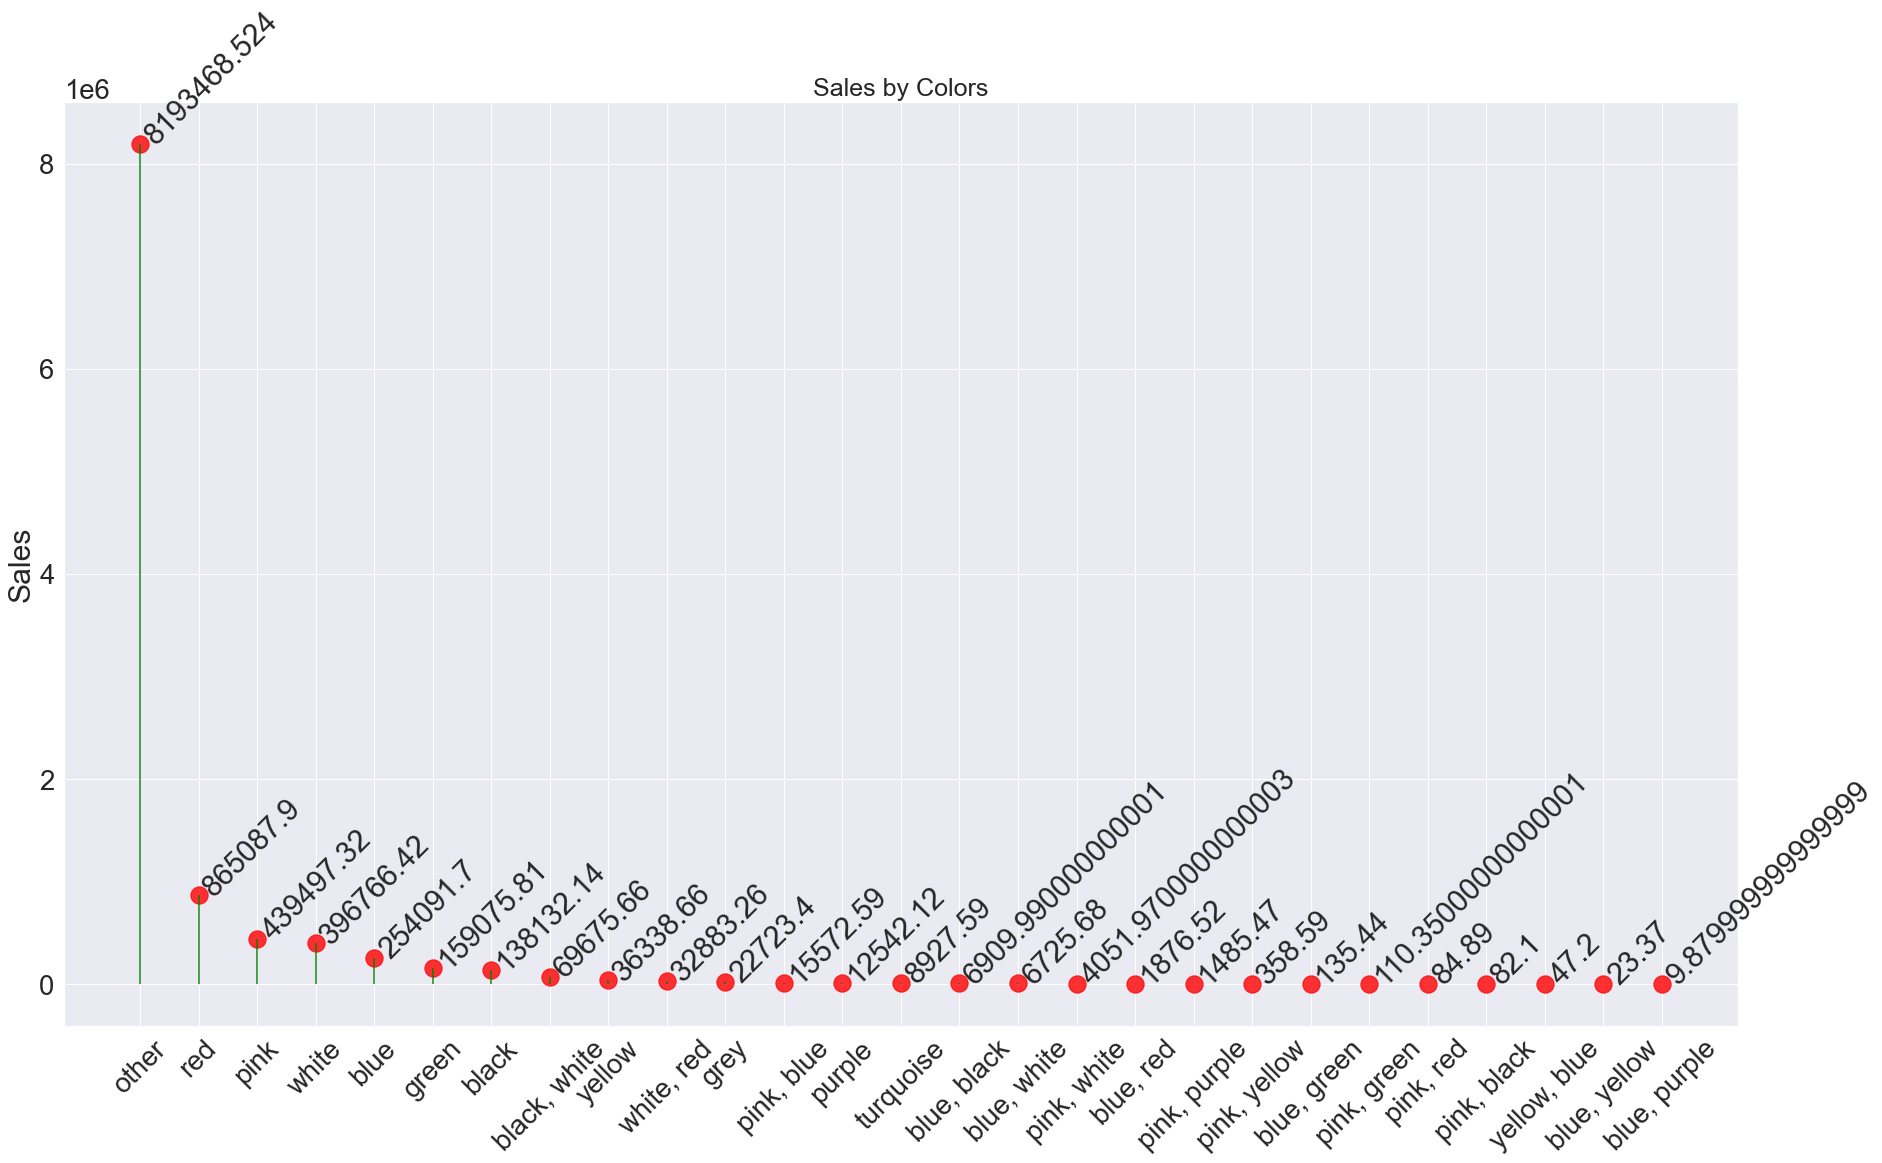

In [175]:


sns.set(font_scale=2.5)
fig,ax=plt.subplots(figsize=(30,17))
ax.vlines(x=colors_sales.color, ymin=0, ymax=colors_sales.total_sum, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=colors_sales.color,y=colors_sales.total_sum, s=300, color='red',alpha=0.8)

ax.set_title("Sales by Colors", fontdict={'size':25})
ax.set_ylabel('Sales')
ax.set_xticks(colors_sales.color)
ax.set_xticklabels(colors_sales.color,rotation=45)


for row in colors_sales.itertuples():
    ax.text(row.color, row.total_sum +200, s=row.total_sum, rotation=45)

**We can see that most common colors that sorted by revenue:**
<br>
Red(865087.900)
<br>
Pink(439497.320)
<br>
White(396766.420)
<br>
Blue(254091.700)
<br>
Green(159075.810
<br>


In [176]:
colors_unit_price=ecommerce_pos[['color','unit_price']].groupby(['color']).mean().sort_values(by='unit_price', ascending=False).reset_index()
colors_unit_price

color  unit_price
0    blue, black    6.774096
1      turquoise    6.594588
2   black, white    4.930895
3          white    4.589874
4           grey    4.475878
5          other    4.035172
6          green    3.935979
7            red    3.635802
8          black    3.597149
9    pink, black    3.550000
10    white, red    3.418515
11        yellow    3.394758
12  pink, yellow    3.192963
13  yellow, blue    2.950000
14          blue    2.946648
15   blue, green    2.761515
16          pink    2.718416
17  blue, purple    2.470000
18     pink, red    2.432857
19   pink, white    2.333183
20        purple    2.259112
21   blue, white    1.886989
22   pink, green    1.805135
23  pink, purple    1.540688
24    pink, blue    1.411726
25     blue, red    1.206131
26  blue, yellow    0.726923

**From here assume see that populatity of color depends not on color itself but it depends on the price of the item. The lower the price is then item is more popular**.

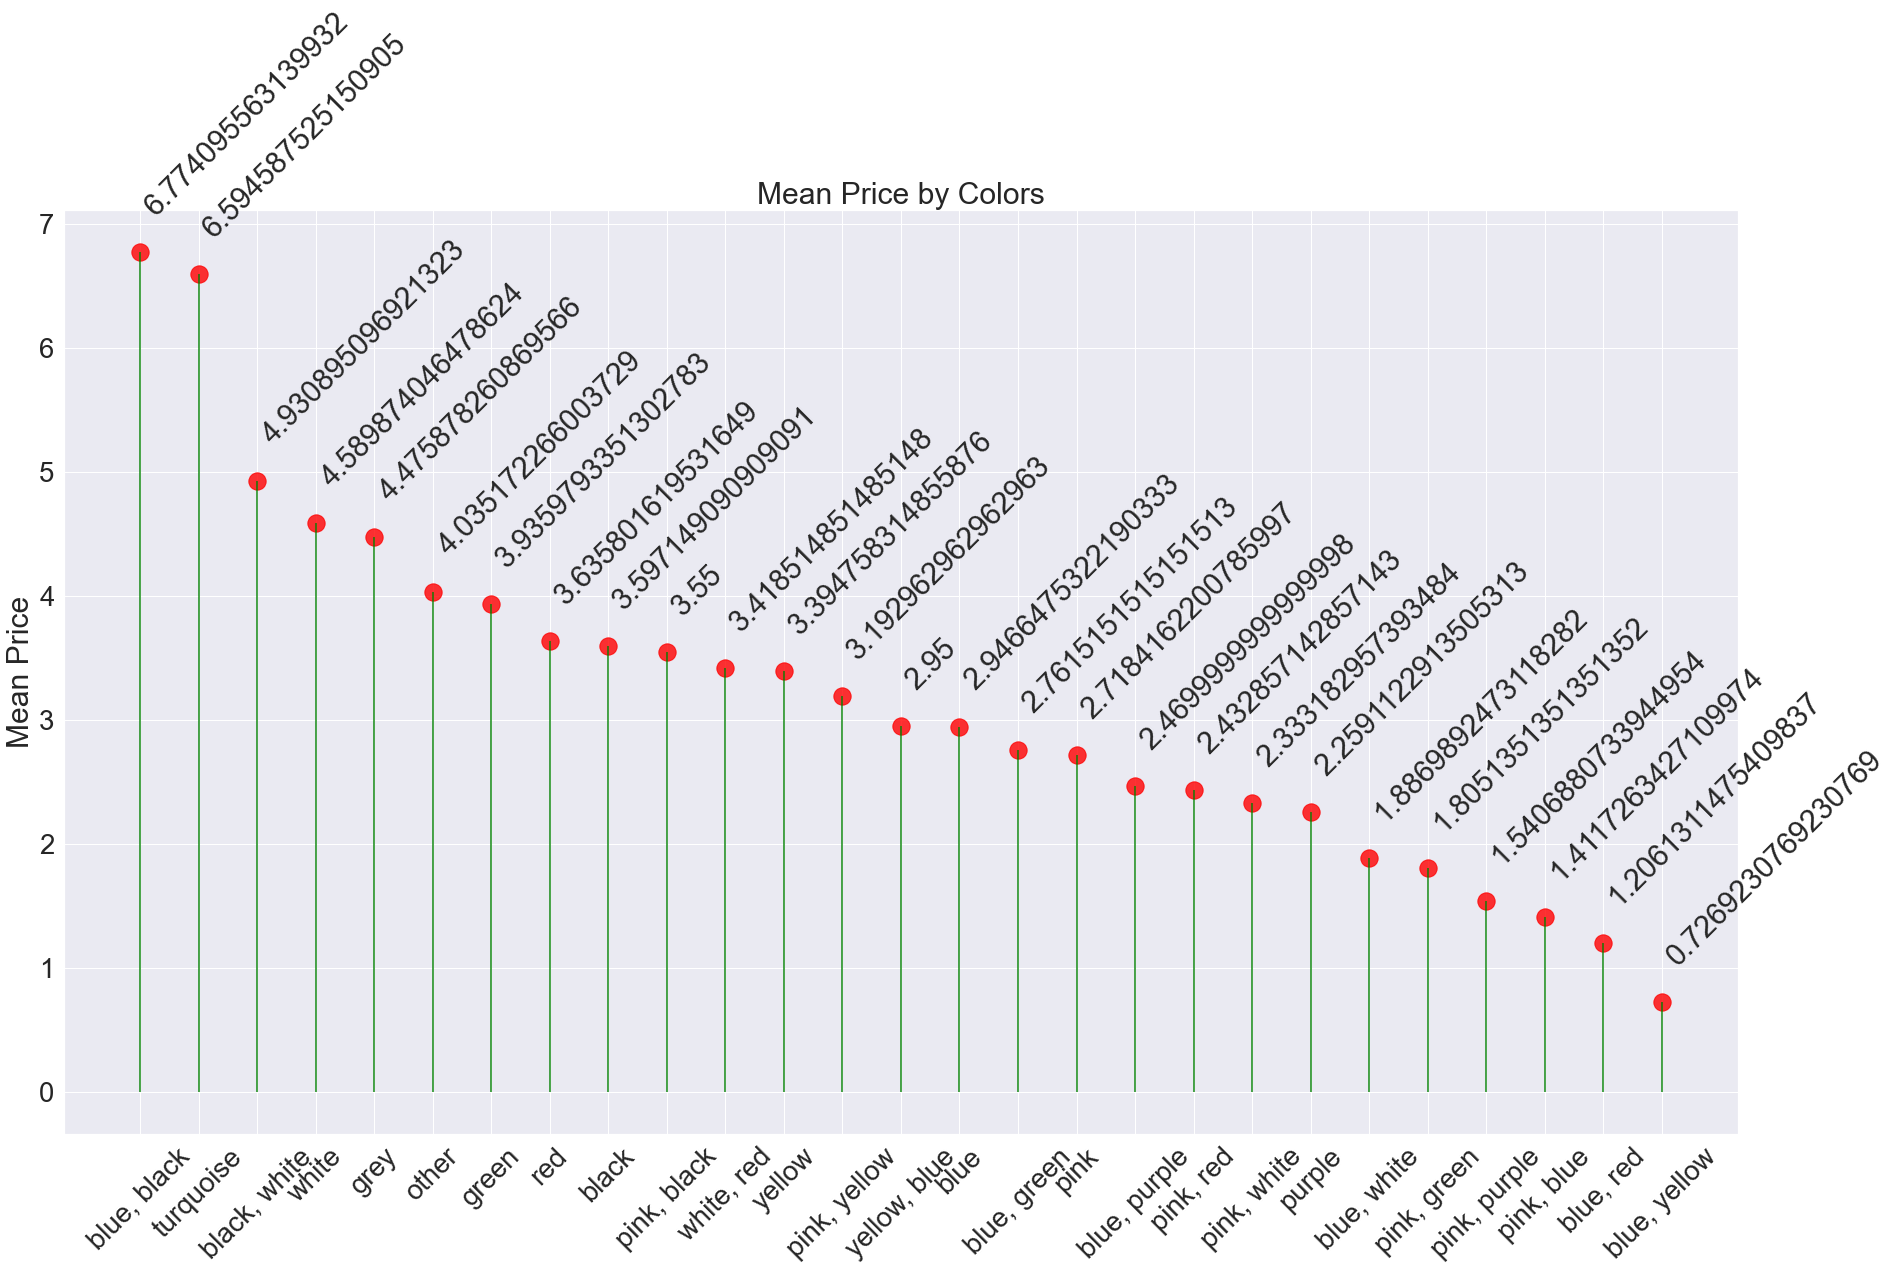

In [177]:


sns.set(font_scale=2.5)
fig,ax=plt.subplots(figsize=(30,17))
ax.vlines(x=colors_unit_price.color, ymin=0, ymax=colors_unit_price.unit_price, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=colors_unit_price.color,y=colors_unit_price.unit_price, s=300, color='red',alpha=0.8)

ax.set_title("Mean Price by Colors", fontdict={'size':30})
ax.set_ylabel('Mean Price')
ax.set_xticks(colors_unit_price.color)
ax.set_xticklabels(colors_unit_price.color,rotation=45)


for row in colors_unit_price.itertuples():
    ax.text(row.color, row.unit_price +0.3, s=row.unit_price, rotation=45)

In [178]:
colors_quantity=ecommerce_pos[['color','quantity']].groupby(['color']).count().sort_values(by='quantity', ascending=False).reset_index()
colors_quantity

color  quantity
0          other    402250
1            red     41123
2           pink     27990
3           blue     17769
4          white     16911
5          green      8904
6          black      5500
7         yellow      2255
8   black, white      1754
9         purple      1318
10    white, red      1212
11          grey      1150
12    pink, blue       782
13     turquoise       497
14   blue, white       465
15   pink, white       399
16     blue, red       305
17   blue, black       293
18  pink, purple       218
19  pink, yellow        54
20   pink, green        37
21   blue, green        33
22     pink, red        21
23  blue, yellow        13
24  yellow, blue         8
25   pink, black         5
26  blue, purple         2

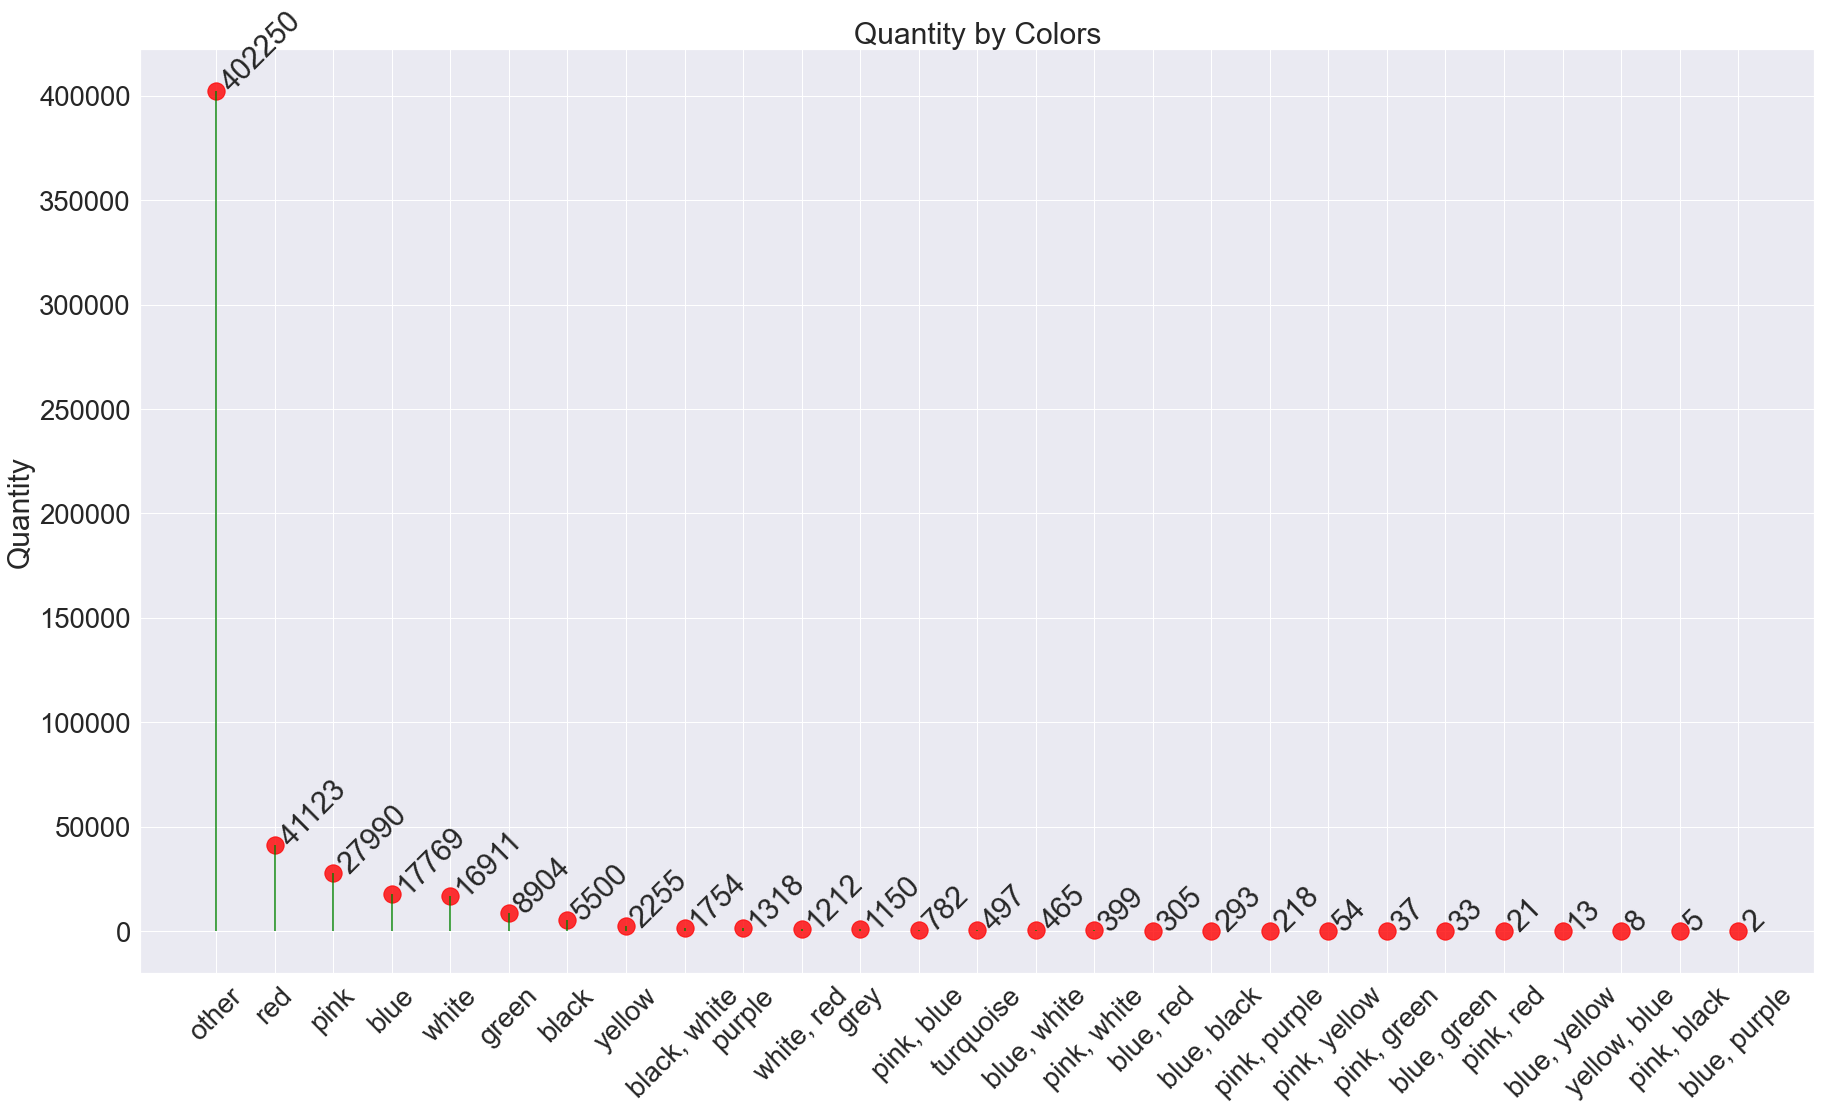

In [179]:


sns.set(font_scale=2.5)
fig,ax=plt.subplots(figsize=(30,17))
ax.vlines(x=colors_quantity.color, ymin=0, ymax=colors_quantity.quantity, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=colors_quantity.color,y=colors_quantity.quantity, s=300, color='red',alpha=0.8)

ax.set_title("Quantity by Colors", fontdict={'size':30})
ax.set_ylabel('Quantity')
ax.set_xticks(colors_quantity.color)
ax.set_xticklabels(colors_quantity.color,rotation=45)


for row in colors_quantity.itertuples():
    ax.text(row.color, row.quantity +0.3, s=row.quantity, rotation=45)

**We can see that most common colors that sorted by quantity:**
<br>
Red(865087.900)
<br>
Pink(439497.320)
<br>
Blue(396766.420)
<br>
White(254091.700)
<br>
Green(159075.810
<br>

**As the same as colors by revenue but blue and white chenged places**

#### Shapes Distribution

In [180]:
shapes_sales=ecommerce_pos[['shape','total_sum']].groupby(['shape']).sum().sort_values(by='total_sum', ascending=False).reset_index()
shapes_sales

shape    total_sum
0                other  8395751.654
1                heart   626036.210
2                  box   404339.610
3                 cake   376677.670
4                  mug   114703.230
5                 bird   109504.530
6                 rose    87989.870
7                 star    83882.250
8                 bowl    83736.160
9                 card    75620.450
10                 egg    52526.940
11              flower    52044.990
12           butterfly    51247.150
13         heart, card    38099.950
14           rose, box    29237.330
15         heart, cake     9509.890
16           cake, box     7356.180
17    heart, butterfly     6921.940
18         flower, box     5259.360
19          heart, box     5129.020
20           bird, mug     5117.700
21             crystal     4845.630
22          heart, egg     4761.780
23      heart, crystal     3925.960
24            box, mug     3755.050
25          card, bird     2815.740
26          bowl, rose     2586.130
27           cake, mug     2214.080
28          bowl, cake     2126.390
29          star, cake     2070.150
30        flower, bowl     2008.490
31          star, card     1997.480
32         heart, bird     1960.000
33        flower, rose     1824.720
34         flower, mug     1768.580
35          card, rose     1474.320
36         flower, egg     1413.670
37       flower, heart     1285.070
38        flower, card      765.270
39         heart, bowl      682.010
40         heart, rose      674.240
41            box, egg      451.860
42       star, crystal      258.250
43  butterfly, crystal      233.830
44     flower, crystal       48.710
45           box, bird       22.060
46           star, egg       13.140
47      butterfly, egg        7.650
48   flower, butterfly        1.250
49          card, cake        0.950

In [181]:
shapes_unit_price = (ecommerce_pos.pivot_table(index='shape', values='unit_price',aggfunc='mean'))
shapes_unit_price.sort_values('unit_price', ascending=False)

unit_price
shape                         
card, bird            5.810513
flower, box           5.382867
rose, box             5.038267
cake, box             4.660950
other                 4.333572
heart, card           4.238509
star, crystal         4.084762
box, mug              3.984836
cake                  3.762454
bowl, cake            3.649281
heart, box            3.573093
flower, crystal       3.371000
box                   3.358905
rose                  3.280706
flower                3.275082
bird, mug             3.071259
star, card            3.043867
heart, cake           2.827964
crystal               2.774196
egg                   2.613367
heart                 2.433610
bowl                  2.335613
butterfly             2.308138
star, cake            2.292286
bird                  2.186172
mug                   2.180176
heart, egg            2.159466
flower, bowl          2.085556
flower, mug           2.058594
heart, rose           2.052427
butterfly, crystal    1.905882
star                  1.812771
heart, bird           1.790714
cake, mug             1.790000
bowl, rose            1.731178
flower, rose          1.684714
box, egg              1.627536
heart, butterfly      1.506065
heart, bowl           1.490116
flower, butterfly     1.250000
flower, heart         1.210875
heart, crystal        1.188861
box, bird             1.087143
star, egg             0.874286
flower, egg           0.866460
butterfly, egg        0.850000
card                  0.760002
flower, card          0.518621
card, rose            0.461660
card, cake            0.190000

In [182]:
shapes_quantity = (ecommerce_pos.pivot_table(index='shape', values='quantity',aggfunc='sum'))
shapes_quantity.sort_values('quantity', ascending=False)

quantity
shape                       
other                4182050
heart                 360704
cake                  264563
box                   209782
card                  143407
mug                    80890
star                   74088
bird                   66682
rose                   53277
bowl                   50248
egg                    35378
flower                 33764
butterfly              29830
heart, card            13849
rose, box               8306
heart, butterfly        5548
heart, cake             4499
heart, crystal          3985
card, rose              3596
heart, egg              3234
crystal                 3185
flower, mug             2684
heart, box              2383
bird, mug               2341
flower, egg             2264
cake, box               1875
bowl, rose              1857
flower, card            1764
box, mug                1687
heart, bird             1492
cake, mug               1456
flower, rose            1372
flower, box             1228
star, cake              1192
flower, bowl            1104
flower, heart           1079
star, card               848
bowl, cake               717
heart, bowl              661
card, bird               564
heart, rose              481
butterfly, crystal       463
box, egg                 312
star, crystal             98
star, egg                 30
box, bird                 24
flower, crystal           22
butterfly, egg             9
card, cake                 5
flower, butterfly          1

### Conclusion:

**From our investigation we can see that popularity of color or shape depends on the price of the item, if certain items are less popular we recommend to low price or to provide additional discount**

### Part 5:   Statistical Hypotheses Test

https://analyticsindiamag.com/a-beginners-guide-to-students-t-test-in-python-from-scratch%EF%BF%BC/

**- Does distribution of product groups change at different time of the day (AM / PM)?**


In [183]:
ecommerce_pos.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id invoice_day invoice_time  \
0 2018-11-29 08:26:00        2.55        17850  2018-11-29     08:26:00   
1 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
2 2018-11-29 08:26:00        2.75        17850  2018-11-29     08:26:00   
3 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   
4 2018-11-29 08:26:00        3.39        17850  2018-11-29     08:26:00   

   total_sum       color  shape  
0      15.30       white  heart  
1      20.34       white  other  
2      22.00       other  other  
3      20.34       other  other  
4      20.34  white, red  other

In [184]:
def distribution_percentile(price):
    print('The histogram of: {}'.format('unit_price'))
    ecommerce_pos['unit_price'].hist()
    plt.show()
    if ecommerce_pos['unit_price'].mean()>ecommerce_pos['unit_price'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('unit_price'))
    print(ecommerce_pos['unit_price'].describe())
    ninety_five = np.percentile(ecommerce_pos['unit_price'], 95)
    five = np.percentile(ecommerce_pos['unit_price'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(ecommerce_pos[(ecommerce_pos['unit_price']<five)|(ecommerce_pos['unit_price']>ninety_five)]),"values that we can consider outliers")

The histogram of: unit_price


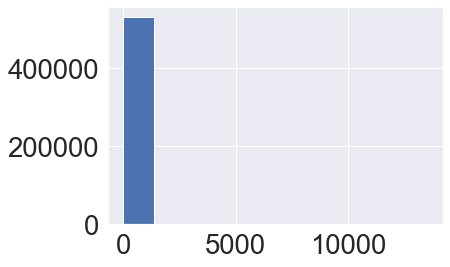

The distribution is skewed to the right
---------------------------------------
Statistics on: unit_price
count    531268.000000
mean          3.899064
std          35.876779
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: unit_price, dtype: float64
---------------------------------------
min border: 0.42
max border: 9.95
---------------------------------------
The outliers are considered to be values below 0.42 and above 9.95
We have 43571 values that we can consider outliers


In [185]:
distribution_percentile('unit_price')

In [186]:
def distribution_percentile(quantity):
    print('The histogram of: {}'.format('quantity'))
    ecommerce_pos['quantity'].hist()
    plt.show()
    if ecommerce_pos['quantity'].mean()>ecommerce_pos['quantity'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('quantity'))
    print(ecommerce_pos['quantity'].describe())
    ninety_five = np.percentile(ecommerce_pos['quantity'], 95)
    five = np.percentile(ecommerce_pos['quantity'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(ecommerce_pos[(ecommerce_pos['quantity']<five)|(ecommerce_pos['quantity']>ninety_five)]),"values that we can consider outliers")

The histogram of: quantity


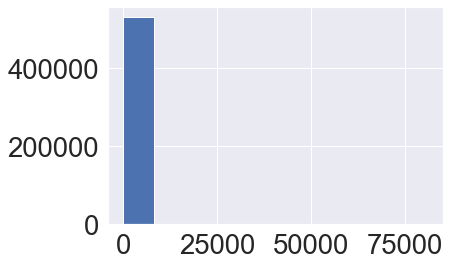

The distribution is skewed to the right
---------------------------------------
Statistics on: quantity
count    531268.000000
mean         10.655409
std         156.832811
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
---------------------------------------
min border: 1.0
max border: 30.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 30.0
We have 25857 values that we can consider outliers


In [187]:
distribution_percentile('quantity')

In [188]:
def distribution_percentile(total_sum):
    print('The histogram of: {}'.format('total_sum'))
    ecommerce_pos['total_sum'].hist()
    plt.show()
    if ecommerce_pos['total_sum'].mean()>ecommerce_pos['total_sum'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('total_sum'))
    print(ecommerce_pos['total_sum'].describe())
    ninety_five = np.percentile(ecommerce_pos['total_sum'], 95)
    five = np.percentile(ecommerce_pos['total_sum'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(ecommerce_pos[(ecommerce_pos['total_sum']<five)|(ecommerce_pos['total_sum']>ninety_five)]),"values that we can consider outliers")

The histogram of: total_sum


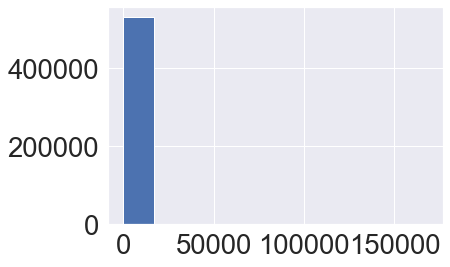

The distribution is skewed to the right
---------------------------------------
Statistics on: total_sum
count    531268.000000
mean         20.077785
std         270.062045
min           0.000000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: total_sum, dtype: float64
---------------------------------------
min border: 1.25
max border: 59.68
---------------------------------------
The outliers are considered to be values below 1.25 and above 59.68
We have 51135 values that we can consider outliers


In [189]:
distribution_percentile('total_sum')

#### The distribution is skewed to the right

In [190]:
def hour_day(invoice_time):
    if invoice_time <= '12:00:00' :
        return '1'

    else:
        return '2'

In [191]:
 ecommerce_pos['hour_of_day'] =   ecommerce_pos['invoice_time'].apply(hour_day)


In [192]:
 ecommerce_pos.sample(5)

invoice_num stock_code                          description  quantity  \
253126      559162      21391          french lavender scent heart         4   
47717       540418      22250  decoration  butterfly  magic garden         9   
475888      576924      22457      natural slate heart chalkboard          6   
2147        536562      22423             regency cakestand 3 tier         2   
30316       538855      21244                 blue polkadot plate          8   

              invoice_date  unit_price  customer_id invoice_day invoice_time  \
253126 2019-07-04 16:29:00        1.63            0  2019-07-04     16:29:00   
47717  2019-01-05 11:04:00        0.81            0  2019-01-05     11:04:00   
475888 2019-11-15 10:53:00        2.95        17419  2019-11-15     10:53:00   
2147   2018-11-29 15:08:00       12.75        13468  2018-11-29     15:08:00   
30316  2018-12-12 13:50:00        1.69        16503  2018-12-12     13:50:00   

        total_sum  color      shape hour_of_day  
253126       6.52  other      heart           2  
47717        7.29  other  butterfly           1  
475888      17.70  other      heart           1  
2147        25.50  other      other           2  
30316       13.52   blue      other           2

In [193]:
group_AM =   ecommerce_pos.query('hour_of_day == "1"')

In [194]:
len(group_AM)

148802

In [195]:
group_PM =  ecommerce_pos.query('hour_of_day == "2"')

In [196]:
len(group_PM)

382466

https://www.statstest.com/mann-whitney-u-test/

https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/

https://www.pythonfordatascience.org/independent-samples-t-test-python/

https://stats.stackexchange.com/questions/233443/how-to-test-for-statistical-differences-between-sets-of-skewed-data

https://www.geeksforgeeks.org/mann-and-whitney-u-test/

### Mann and Whitney U test

**Since our data is right-skewed we desided to run  Mann and Whitney U test.** 

**Null hypothesis:**

Average  unite_price of the AM and PM groups are the same.


**Alternative hypothesis:**

Average  unit_price of the AM and PM groups are different.

In [197]:
from scipy.stats import mannwhitneyu

In [198]:
stat, p = mannwhitneyu(group_AM['unit_price'], group_PM['unit_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=28759857506.000, p=0.000
Different distribution (reject H0)


#### Average unite_price of the AM and PM groups are not the same.

**Null hypothesis:**

Average  **quantity** of the AM and PM groups are the same.

**Alternative hypothesis:**

unite_priceAverage  **quantity** of the AM and PM groups are not the same.

In [199]:
stat, p = mannwhitneyu(group_AM['quantity'], group_PM['quantity'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=34079016869.500, p=0.000
Different distribution (reject H0)


#### Average quantity of the AM and PM groups are different

### ANOVA test

#### Checking out the assuming that Color And Unit Price are correlating

 **Assumption(H0) is that Color and Unit Prices are NOT correlating**

 **Assumption(H1) is that Color and Unit Prices are correlated**

In [200]:
from scipy.stats import f_oneway

In [201]:
CategoryGroupLists=ecommerce_pos.groupby('color')['unit_price'].apply(list)

In [202]:
AnovaResults = f_oneway(*CategoryGroupLists)
print('p-value = %.3f' % ( p))
alpha = 0.05
if p > alpha:
    print('Fail to reject H0(Color and Unit Prices are NOT correlating)')
else:
    print('Reject H0(Color and Unit Prices are correlating)')


p-value = 0.000
Reject H0(Color and Unit Prices are correlating)


**We have strong correlation between Color and Unit Price**


### Part 6:    Summary and Suggestion


#### Part 1:  Data Overview and Preprocessing

<br>
In this section we loaded our dataset. We prepared or data set by checking for missing values and duplicate values. Also we canged datatypes in certein columns.
<br>

**We investigated all the "Duplicates" in our data and discovered that they are duplicates for a reason.
<br>
InvoiceNo : 1933 can be duplicated because we have multiple products in same order
<br>
StockCode : 1706 can be duplicated because we have same products in different orders
<br>
Description : 1732 can be duplicated because we have same descriptoion for same products
<br>
Quantity : 35 we have few orders with same quantity
<br>
InvoiceDate : 1914 we have many orders in same date
<br>
UnitPrice : 80 we have different products with same prise
<br>
CustomerID : 960 same user can make more then one order
<br>
<br>
So we don't need to remove any "duplicates"**
<br>

#### Part 2:  RFM (Recency / Frequency / Monetary)
<br>

Into **"Whipped Cream"** group we entered items
<br>
RFM segment 444-244 
<br>
Total Score 10-12
<br>
Items that  have generated the most revenue for your store.
<br>

**Recomendation:** Consider premium offers, subscription tiers, luxury products, or value add cross/up-sells to increase AOV. Don't waste margin on discounts.
<br>

Into **"Loyal"** group we entered items
<br>
RFM segment 134-431 
<br>
Total Score 8
<br>
Item that ordered often, but do not bring a lot revenue.
<br>

**Recomendation:**  Focus on increasing monetization through product recommendations based on past purchases and incentives.
<br>

Into **"Potential"** group we entered items
<br>
RFM segment 124-421 
<br>
Total Score 7
<br>
Above average recency, frequency and monetary, but not have ordered very recently
<br>

**Recomendation:** Make limited time offers. Focus on increasing monetization through product recommendations based on past purchases and incentives. 

<br>

Into **"Promising"** group we entered items
<br>
RFM segment 114-411 
<br>
Total Score 6
<br>
Below average recency, frequency and monetary and not have ordered very recently
<br>

**Recomendation:** Offer Personal Discounts.  Make limited time offers. Focus on increasing monetization through product recommendations based on past purchases and incentives. 
<br>

Into **"Needs attention"** group we entered items
<br>
RFM segment 113-311 
<br>
Total Score 5
<br>
Below average recency, frequency and monetary and not have ordered very recently, costumers loosing interest to the items
<br>

**Recomendation:** Make limited time offers. Provide discounts. Put them together with products from more valueble group. 

<br> 

Into **"At risk"** group we entered items
<br>
RFM segment 111-211 
<br>
Total Score 3-4
<br>
Lowest average recency, frequency and monetary. 

**Recomendation:** Renew interest by reach out campaign. May be think about to remove them from your shop


**Here we have really very balanced distribution: 20% of 'Whipped Cream' prodacts and only 11% 'At risk. In our dataset we have not enough user_id but we have all invoice_num. We can find all missing users ID`s by the orders thay did.

<br>

**We took for example the 'Whipped Cream' group that contains the most sellable items. From our investigation we can see that ptobucts in this group have stable price and then you by big amount of prodacts you can , get apperently, god discount. Beacoseof that we can see that products in this group have good distribution across all time period of our dataset**

<br>

**We took for example the 'At risk' group that contains the less sellable items. From our investigation we can see that prises for products in this group are not stable, we have suspisios jumps of the prices. We recommend try to keep prices stable, give more discounts on this products and,may be, locate 'At risk' products together with items from more profitable groups**



#### Part 3: Product Bundle Analysis

**From the rules results above, we could see that "green regency teacup and saucer" and "pink regency teacup and saucer" are the items that has the highest association each other since these two items has the highest “lift” value. The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other. In thise case, the highest value is 15.028131 which is very high. It means these 2 items are very good to be sold together.**

<br>


**Additional recommendations for bundles**
<br>
**green regency teacup** and **saucer and pink regency teacup and saucer**:  lift value = 15.028131
<br>
**roses regency teacup and saucer** and **pink regency teacup and saucer**:  lift value = 13.578784
<br>
**paper chain kit 50's christmas** and **paper chain kit vintage christmas**:  lift value = 10.758992
<br>
**lunch bag pink polkadot** and **lunch bag red retrospot**:  lift value = 6.528866
<br>

**Item Placements**. We could put "green regency teacup and saucer" and "pink regency teacup and saucer" in a closer place, maybe in a same page or any other closer place.
<br>

**Products Bundling**. We could put "green regency teacup and saucer" and "pink regency teacup and saucer" as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.
<br>

**Customer Recommendation and Discounts**.  We could put "green regency teacup and saucer" in the checkout page, so that every time a customer bought "green regency teacup and saucer", we could offer and recommend them to buy "pink regency teacup and saucer" with a lower price.

#### Part 4: Product Description Analysis

**From here we can see that most common colors in our dataset are:**
<br>
'pink','blue','red','white','green','black','purple','yellow','turquoise','grey'
<br>
**We have strong correlation between Color and Unit Price as we see ftom ANOVA test. **

**From here we can see that most common shapes in our dataset are:**
<br>
'heart','box','flower','card','holder','rose',
                       'cake','star','mug','egg','bowl','crystal','bird','butterfly'
<br>

**From our investigation we can see that popularity of color or shape depends on the price of the item, if certain items are less popular we recommend to low price or to provide additional discount**

#### Part 5:   Statistical Hypotheses Test

**To perform our statistical test we performed the distribution chesk. We found out thet we have right-skewed distribution.**

**Since our data is right-skewed we desided to run  Mann and Whitney U test** 

#### Average unite_price of the AM and PM groups are different


#### Average quantity of the AM and PM groups are different

**We suggest to check out the PM group. We can see that customers perform orders at PM time twice more then at AM time. It be good to provide more discount suggestions in the PM time.**